In [167]:
import numpy as np
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import time
import pandas as pd

In [168]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

font_size = 10

# matplotlib.rcParams.keys()
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400,'axes.linewidth':1,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)

sns.set(style='ticks',rc=rc) 
sns.set_context("paper")
# sns.palplot(sns.color_palette(flatui))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign
centimeter = 1/2.54  # centimeter in inches

In [169]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
# sc.settings.set_figure_params(dpi=400, dpi_save=400, figsize=(6,6), fontsize = 10, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==1.1.2 statsmodels==0.12.2 python-igraph==0.9.11 pynndescent==0.5.7


In [170]:
from _utils import get_adata, update_celltype,set_cell2loc_palette
import edge


In [171]:
sample_list=['CDQ_C3','CDQ_D4','CDQ_E3','CXF_D1','HX_D3','LJT_F6','TJ_E4','GXY_F3','ZZW_F5','ZH1_B1B2','ZH2_B3B4','ZH3_C1C2','ZH4_C3C4','LXS_D3D4','LXS_D5D6']
adata_paths = [r'/hwfssz1/ST_HEALTH/P20Z10200N0170/jiangyongchao/project/HX_lung/cell2loc/'+pat_id+'_bin100.leiden.cell2location.gzip.h5ad' 
               for pat_id in sample_list]
adata_fnames = dict(zip(sample_list, adata_paths))


In [189]:
pat_id = 'LXS_D5D6' 
adata=get_adata(adata_fnames[pat_id], log=True)

normalizing counts per cell
    finished (0:00:02)


In [190]:
adata

AnnData object with n_obs × n_vars = 43171 × 13182
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'sample', '_indices', '_scvi_batch', '_scvi_labels', 'AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell', 'cell2location_max'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'SYMBOL', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod', 'log1p'
    obsm: 'MT', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'
    layers: 'count', 'no

In [191]:
celltype_list = ['AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 
                 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell']
update_celltype(adata,celltype_list,min_frac_ct=1, update_cell2loc=True)


In [192]:
adata

AnnData object with n_obs × n_vars = 43171 × 13182
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'sample', '_indices', '_scvi_batch', '_scvi_labels', 'AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell', 'cell2location_max'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'SYMBOL', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod', 'log1p'
    obsm: 'MT', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf', 'cell_type_update'
    

In [193]:
adata.obsm['cell_type_update']

,AT1,AT2,AT2_like,B_cell,Basal,Ciliated,Club,DC,Endothelial,Erythrocyte,Fibroblast,Granulocyte,MAST_cell,Macrophage,NK,T_cell,sec_max_ind,top_max_ind,ratio,ct_update
cell_name,,,,,,,,,,,,,,,,,,,,
100-100,0.033770,0.099562,0.097300,0.008756,0.237067,0.241049,0.036716,0.016465,0.056110,0.016436,0.031884,0.028465,0.021144,0.021727,0.025685,0.027863,4,5,1.016796,Ciliated
100-101,0.045050,0.097490,0.040933,0.014925,0.324244,0.147012,0.045500,0.009159,0.073676,0.019918,0.055351,0.030542,0.029594,0.005505,0.031473,0.029629,5,4,2.205564,Basal
100-102,0.046603,0.161136,0.059352,0.007385,0.326463,0.152185,0.034523,0.011639,0.040401,0.013987,0.039918,0.026716,0.021741,0.010254,0.027110,0.020586,1,4,2.026013,Basal
100-103,0.031905,0.178119,0.043526,0.009153,0.341275,0.102048,0.036573,0.013779,0.039396,0.017765,0.059746,0.036447,0.023638,0.016258,0.028083,0.022289,1,4,1.915996,Basal
100-104,0.046277,0.143899,0.038266,0.007699,0.328114,0.150306,0.038059,0.014282,0.051909,0.016135,0.045023,0.030888,0.027097,0.007265,0.031301,0.023479,5,4,2.182963,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99-95,0.057409,0.140700,0.068720,0.010673,0.229545,0.126527,0.049117,0.020134,0.049946,0.020544,0.043407,0.056920,0.021793,0.023412,0.035589,0.045563,1,4,1.631452,Basal
99-96,0.030534,0.166911,0.149636,0.013456,0.223363,0.067319,0.029338,0.025919,0.090427,0.016046,0.039895,0.047876,0.020608,0.017762,0.029930,0.030981,1,4,1.338216,Basal
99-97,0.048876,0.139263,0.049477,0.015242,0.286778,0.152297,0.038417,0.022468,0.045212,0.016577,0.030605,0.053312,0.032105,0.015568,0.027602,0.026202,5,4,1.883015,Basal


# Region 2

In [345]:
# large region
im_map = edge.creat_imarray(adata)
area, boundary = edge.find_boundary(im_map,min_thre_binary=125, 
                 max_thre_binary=185, 
                 gaussian_sigma=0)

# im_map = edge.creat_imarray(adata)
# area, boundary = edge.find_boundary(im_map,min_thre_binary=40, 
#                  max_thre_binary=185, 
#                  gaussian_sigma=0)


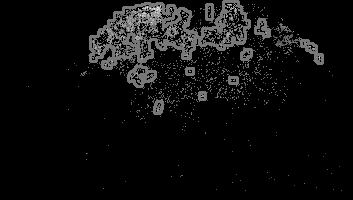

In [346]:
from PIL import Image
import cv2

im_map_raw = im_map.copy()
cv2.drawContours(im_map_raw, boundary, -1, 120, 2)
Image.fromarray(im_map_raw)

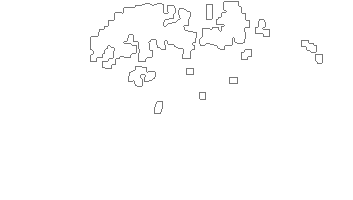

In [347]:
# just show boundary
CntExternalMask = np.ones(im_map.shape[:2], dtype="uint8") * 255
cv2.drawContours(CntExternalMask, boundary, -1, 120, 1)
Image.fromarray(CntExternalMask)

/jdfssz1/ST_HEALTH/P18Z10200N0124/AI/user/baiyong/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[0][24]=x[0][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
/jdfssz1/ST_HEALTH/P18Z10200N0124/AI/user/baiyong/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[1][24]=x[1][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %


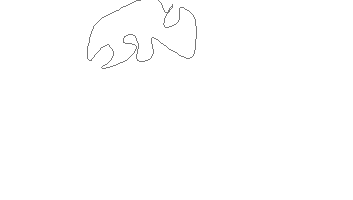

In [348]:
smoothed_b = edge.smooth_boundary([boundary[0]], factor=0.01, intp=True,n_interp=200) # 0.002

CntExternalMask = np.ones(im_map.shape[:2], dtype="uint8") * 255
cv2.drawContours(CntExternalMask, smoothed_b, -1, 120, 1)
Image.fromarray(CntExternalMask)


In [336]:
def _filter_line(bound_ploy, x_left, x_right, y_bottom, y_top):
    """
    x_left < x_right
    y_bottom > y_top
    """
    u_bound = []
    for x,y in zip(bound_ploy.boundary.xy[0],bound_ploy.boundary.xy[1]):
        if (x > x_left and y > y_top) and (x < x_right and y < y_bottom):
            u_bound.append([x,y])
        else:
            u_bound.append([None, None])
    arr = np.array(u_bound)
    return arr

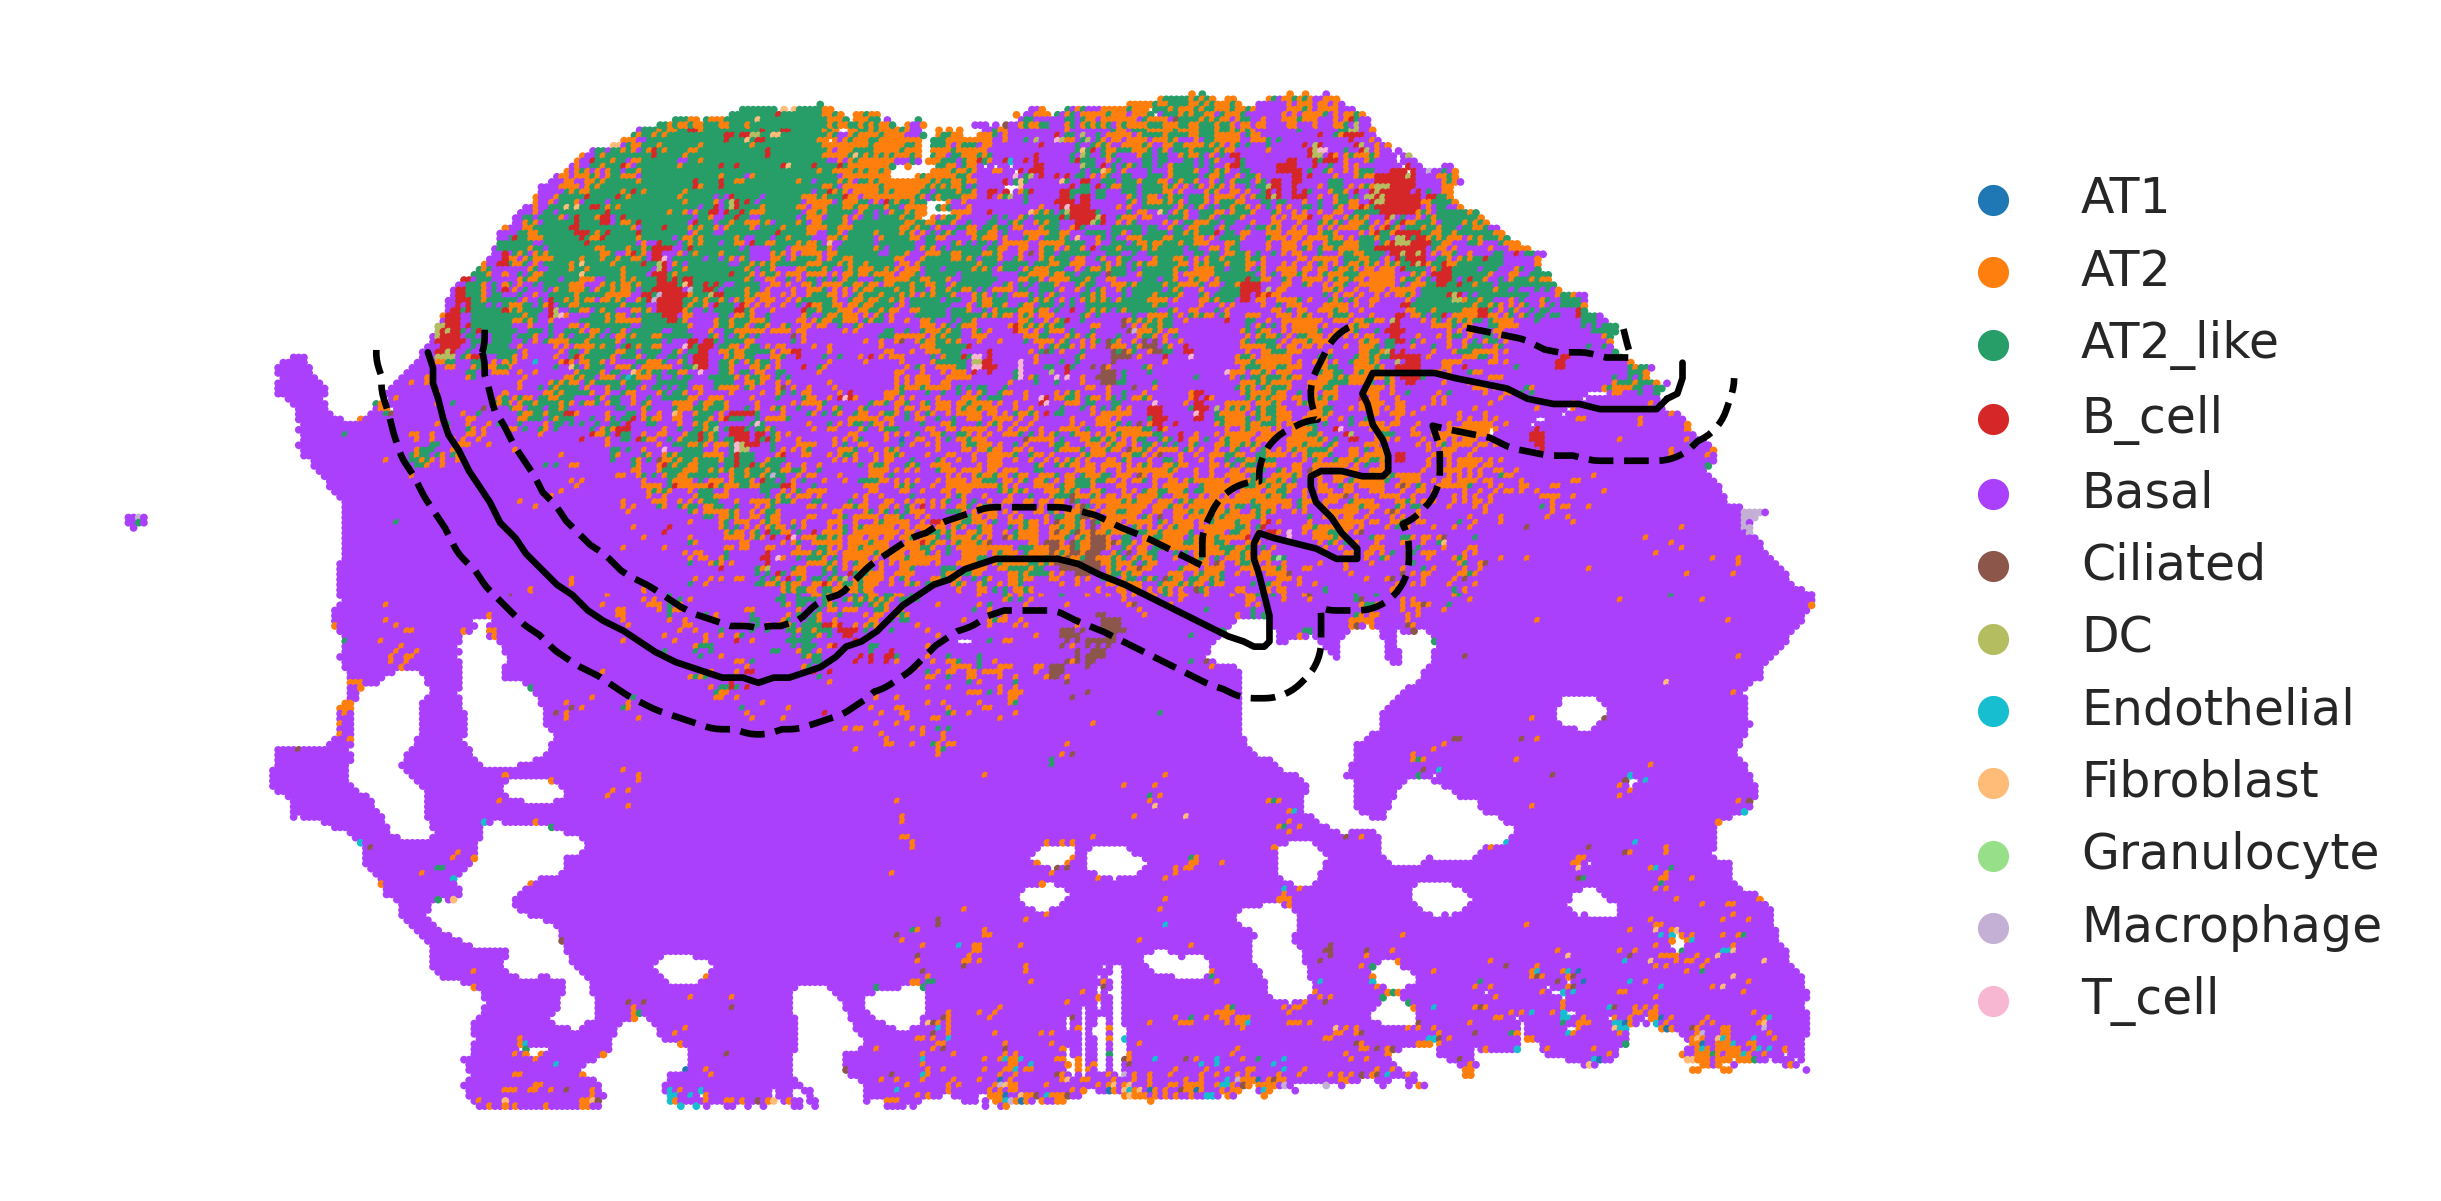

In [337]:
# draw plot to show boundary
# distance = 10, equal to 500 mum
roi_b = smoothed_b[0]
o_b, f_b, b_b = edge.find_distance_boundary(roi_b, distance=10)

fig,ax = plt.subplots(figsize=(6,6))
sc.pl.spatial(adata, color=['cell2location_max'], title='', spot_size=1.5,frameon = False, show=False, ax=ax, palette = set_cell2loc_palette(celltype_list))

x_left, x_right = ax.get_xlim()
y_bottom, y_top = ax.get_ylim()

ob_b = _filter_line(o_b, x_left, x_right, y_bottom-60, y_top+60)

fb_b = _filter_line(f_b, x_left+10, x_right, y_bottom-10, y_top+60)
bb_b = _filter_line(b_b, x_left, x_right-50, y_bottom-10, y_top+55)

ax.plot(ob_b[:,0],ob_b[:,1], color='black')
ax.plot(fb_b[:,0],fb_b[:,1], color='black', linestyle='dashed')
ax.plot(bb_b[:,0],bb_b[:,1], color='black', linestyle='dashed')

plt.savefig(f"results/edge/boundary_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')

In [288]:
from shapely.geometry import Point
coords = adata.obsm['spatial']
coords_pt = list(map(Point, zip(coords[:,0],coords[:,1])))

def get_pt_btw_boundary(coords_pt, outer_b, in_b):
    return np.array([1 if outer_b.contains(i) and not in_b.contains(i) else 0 for i in coords_pt])

In [289]:


o_b, f_b_p5, b_b_m5 = edge.find_distance_boundary(roi_b, distance=5)
_, f_b_p10, b_b_m10 = edge.find_distance_boundary(roi_b, distance=10)
_, f_b_p15, b_b_m15 = edge.find_distance_boundary(roi_b, distance=15)
_, f_b_p20, b_b_m20 = edge.find_distance_boundary(roi_b, distance=20)

_, f_b_p25, b_b_m25 = edge.find_distance_boundary(roi_b, distance=25)

pt_in_p5_ob = get_pt_btw_boundary(coords_pt, f_b_p5, o_b)
pt_in_p10_p5 = get_pt_btw_boundary(coords_pt, f_b_p10, f_b_p5)
pt_in_p15_p10 = get_pt_btw_boundary(coords_pt, f_b_p15, f_b_p10)
pt_in_p20_p15 = get_pt_btw_boundary(coords_pt, f_b_p20, f_b_p15)
pt_in_p25_p20 = get_pt_btw_boundary(coords_pt, f_b_p25, f_b_p20)

pt_in_m5_ob = get_pt_btw_boundary(coords_pt, o_b, b_b_m5)
pt_in_m10_m5 = get_pt_btw_boundary(coords_pt, b_b_m5, b_b_m10)
pt_in_m15_m10 = get_pt_btw_boundary(coords_pt, b_b_m10, b_b_m15)
pt_in_m20_m15 = get_pt_btw_boundary(coords_pt, b_b_m15, b_b_m20)
pt_in_m25_m20 = get_pt_btw_boundary(coords_pt, b_b_m20, b_b_m25)


In [290]:
adata_p5_ob = adata[pt_in_p5_ob==1,:]
adata_p10_p5 = adata[pt_in_p10_p5==1,:]
adata_p15_p10 = adata[pt_in_p15_p10==1,:]
adata_p20_p15 = adata[pt_in_p20_p15==1,:]

adata_p25_p20 = adata[pt_in_p25_p20==1,:]

adata_m5_ob = adata[pt_in_m5_ob==1,:]
adata_m10_m5 = adata[pt_in_m10_m5==1,:]
adata_m15_m10 = adata[pt_in_m15_m10==1,:]
adata_m20_m15 = adata[pt_in_m20_m15==1,:]

adata_m25_m20 = adata[pt_in_m25_m20==1,:]

In [291]:
adas = [adata_p5_ob, adata_p10_p5, adata_p15_p10, adata_p20_p15,adata_p25_p20, adata_m5_ob, adata_m10_m5, adata_m15_m10, adata_m20_m15,adata_m25_m20]
dist_lab = ['0-5','5-10','10-15','15-20','20-25', '-5-0', '-10--5','-15--10','-20--15','-25--20']
# dist_lab = [-1,-2,-3, -4, 1, 2, 3 , 4]
# orders = ['15-20','10-15','5-10','0-5', '-5-0', '-10--5','-15--10','-20--15']

df_cell_type_frac_regs=None
for i, ada in enumerate(adas):
    if i==0:
        df_cell_type_frac = ada.obsm['cell_type_update'].copy()
        df_cell_type_frac['region'] = [dist_lab[i]] * df_cell_type_frac.shape[0]
        df_cell_type_frac_regs = df_cell_type_frac
    else:
        df_cell_type_frac1 = ada.obsm['cell_type_update'].copy()
        df_cell_type_frac1['region'] = [dist_lab[i]] * df_cell_type_frac1.shape[0]
        df_cell_type_frac_regs = pd.concat([df_cell_type_frac_regs, df_cell_type_frac1], ignore_index=True)


In [292]:
import pickle
with open(f'results/edge/adatas_{pat_id}.pkl','wb') as f:
    pickle.dump(adas, f)

In [293]:
df_cell_type_frac_regs

,AT1,AT2,AT2_like,B_cell,Basal,Ciliated,Club,DC,Endothelial,Erythrocyte,...,Granulocyte,MAST_cell,Macrophage,NK,T_cell,sec_max_ind,top_max_ind,ratio,ct_update,region
0,0.049886,0.200391,0.215101,0.010788,0.150355,0.065277,0.031903,0.021574,0.067354,0.015599,...,0.018776,0.021460,0.028472,0.028825,0.026175,1,2,1.073406,AT2_like,0-5
1,0.066473,0.142169,0.077789,0.008936,0.278566,0.085581,0.036564,0.020393,0.052065,0.019810,...,0.046675,0.028278,0.033749,0.038278,0.028135,1,4,1.959394,Basal,0-5
2,0.057711,0.123360,0.135516,0.012034,0.189365,0.120906,0.047962,0.023052,0.075354,0.022198,...,0.020890,0.032718,0.027730,0.037409,0.033108,2,4,1.397356,Basal,0-5
3,0.044123,0.132543,0.072299,0.010781,0.233651,0.079130,0.048875,0.020029,0.067269,0.019072,...,0.046181,0.019608,0.014782,0.038308,0.030699,1,4,1.762825,Basal,0-5
4,0.065247,0.169551,0.165786,0.016151,0.158539,0.123961,0.031329,0.025608,0.058123,0.016540,...,0.022236,0.018798,0.022446,0.025534,0.025265,2,1,1.022709,AT2,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20834,0.031241,0.067171,0.040700,0.083424,0.186088,0.093427,0.044310,0.085495,0.057441,0.034067,...,0.027628,0.030241,0.039629,0.049868,0.074392,5,4,1.991794,Basal,-25--20
20835,0.028500,0.051421,0.031387,0.091876,0.194966,0.088622,0.045961,0.081269,0.071155,0.036151,...,0.028912,0.034247,0.039826,0.054830,0.079812,3,4,2.122042,Basal,-25--20
20836,0.011936,0.026823,0.041165,0.168746,0.083176,0.043586,0.042711,0.157081,0.042236,0.044523,...,0.010333,0.028683,0.071099,0.057023,0.111252,7,3,1.074265,B_cell,-25--20
20837,0.011490,0.030484,0.038425,0.190339,0.088708,0.041298,0.046237,0.129032,0.042362,0.046200,...,0.013440,0.027653,0.047361,0.069950,0.126505,7,3,1.475136,B_cell,-25--20


In [294]:
df_cell_type_frac_regs.to_csv(f"results/edge/cell_boundary_{pat_id}.csv", index=False)

In [295]:
from matplotlib import cm, colors
x = list(map(colors.to_hex, sns.color_palette('pastel')))
print(x)
x = list(map(colors.to_hex, sns.color_palette('bright')))
print(x)


['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']
['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#a3a3a3', '#ffc400', '#00d7ff']


In [296]:
# bg_f = ['#b9f2f0', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#fffea3', ]
# ln_f = ['#00d7ff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#ffc400', ]
bg_f = ['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']
ln_f = ['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#a3a3a3', '#ffc400', '#00d7ff']

In [297]:
sns.color_palette(x)

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [298]:
import plotting

In [299]:
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

def plot_show(df_cell_type_frac_regs, val_col, save=True, y_label='Fraction of Cell Type', gene=False, gene_cell_type=None, bg_f=bg_f, ln_f=ln_f):
    
    comp_pairs = [('20-25','15-20'),('15-20','10-15'),('10-15','5-10'),('5-10','0-5'), ('0-5','-5-0'), 
                  ('-5-0','-10--5'), ('-10--5','-15--10'),('-15--10','-20--15'),('-20--15','-25--20')]
    orders = ['20-25','15-20','10-15','5-10','0-5', '-5-0', '-10--5','-15--10','-20--15','-25--20']

    fig = plt.figure(figsize=(4.5,3.2))
    gs1 = GridSpec(2, 1, hspace=0.3,height_ratios=[8, 1.2])
    ax1 = fig.add_subplot(gs1[0])
    ax2 = fig.add_subplot(gs1[1])

    axa = plotting.boxplot(df_cell_type_frac_regs, 'region', val_col, ax1, comp_pairs,orders=orders, gene=gene,bg_f=bg_f, ln_f=ln_f)

    ax1.axvline(4.5,linewidth=0.8, color='gray', linestyle='dashed',ymax=0.6)
    ax1.tick_params(pad=1)
    ax1.set_xticklabels(
        labels=['-1250 $\mu$m','-1000 $\mu$m','-750 $\mu$m','-500 $\mu$m','-250 $\mu$m','250 $\mu$m','500 $\mu$m','750 $\mu$m','1000 $\mu$m','1250 $\mu$m'], rotation=20,ha='center', va='top')
    ax1.set_xlabel(None)
    ax1.set_ylabel(y_label)
    if not gene:
        ax1.set_title(val_col)
    else:
        ax1.set_title(f'$\it{val_col}$')

    p = patches.FancyArrowPatch((0, 0.5), (1, 0.5), arrowstyle='<|-|>', mutation_scale=10,color='k')
    ax2.add_patch(p)
    ax2.plot([0.5,0.5],[0.5016,0.51],color='k')
    ax2.text(0.15, 0.472, 'Normal', ha='center', va='center')
    ax2.text(0.5, 0.472, 'Boundary', ha='center', va='center')
    ax2.text(0.85, 0.472, 'Tumor',  ha='center', va='center')
    ax2.axis('off')
    sns.despine()
    if save:
        if gene:
            plt.savefig(f"results/edge/{gene_cell_type}_{val_col}_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')
        else:
            plt.savefig(f"results/edge/ct_{val_col}_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

20-25 vs. 15-20: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.514e-10 U_stat=9.002e+05
15-20 vs. 10-15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.108e-04 U_stat=9.817e+05
10-15 vs. 5-10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.332e-02 U_stat=1.181e+06
5-10 vs. 0-5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.525e-01 U_stat=1.784e+06
0-5 vs. -5-0: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.829e-07 U_stat=2.380e+06
-5-0 vs. -10--5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.404e-15 U_stat=2.744e+06
-10--5 vs. -15--10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correct

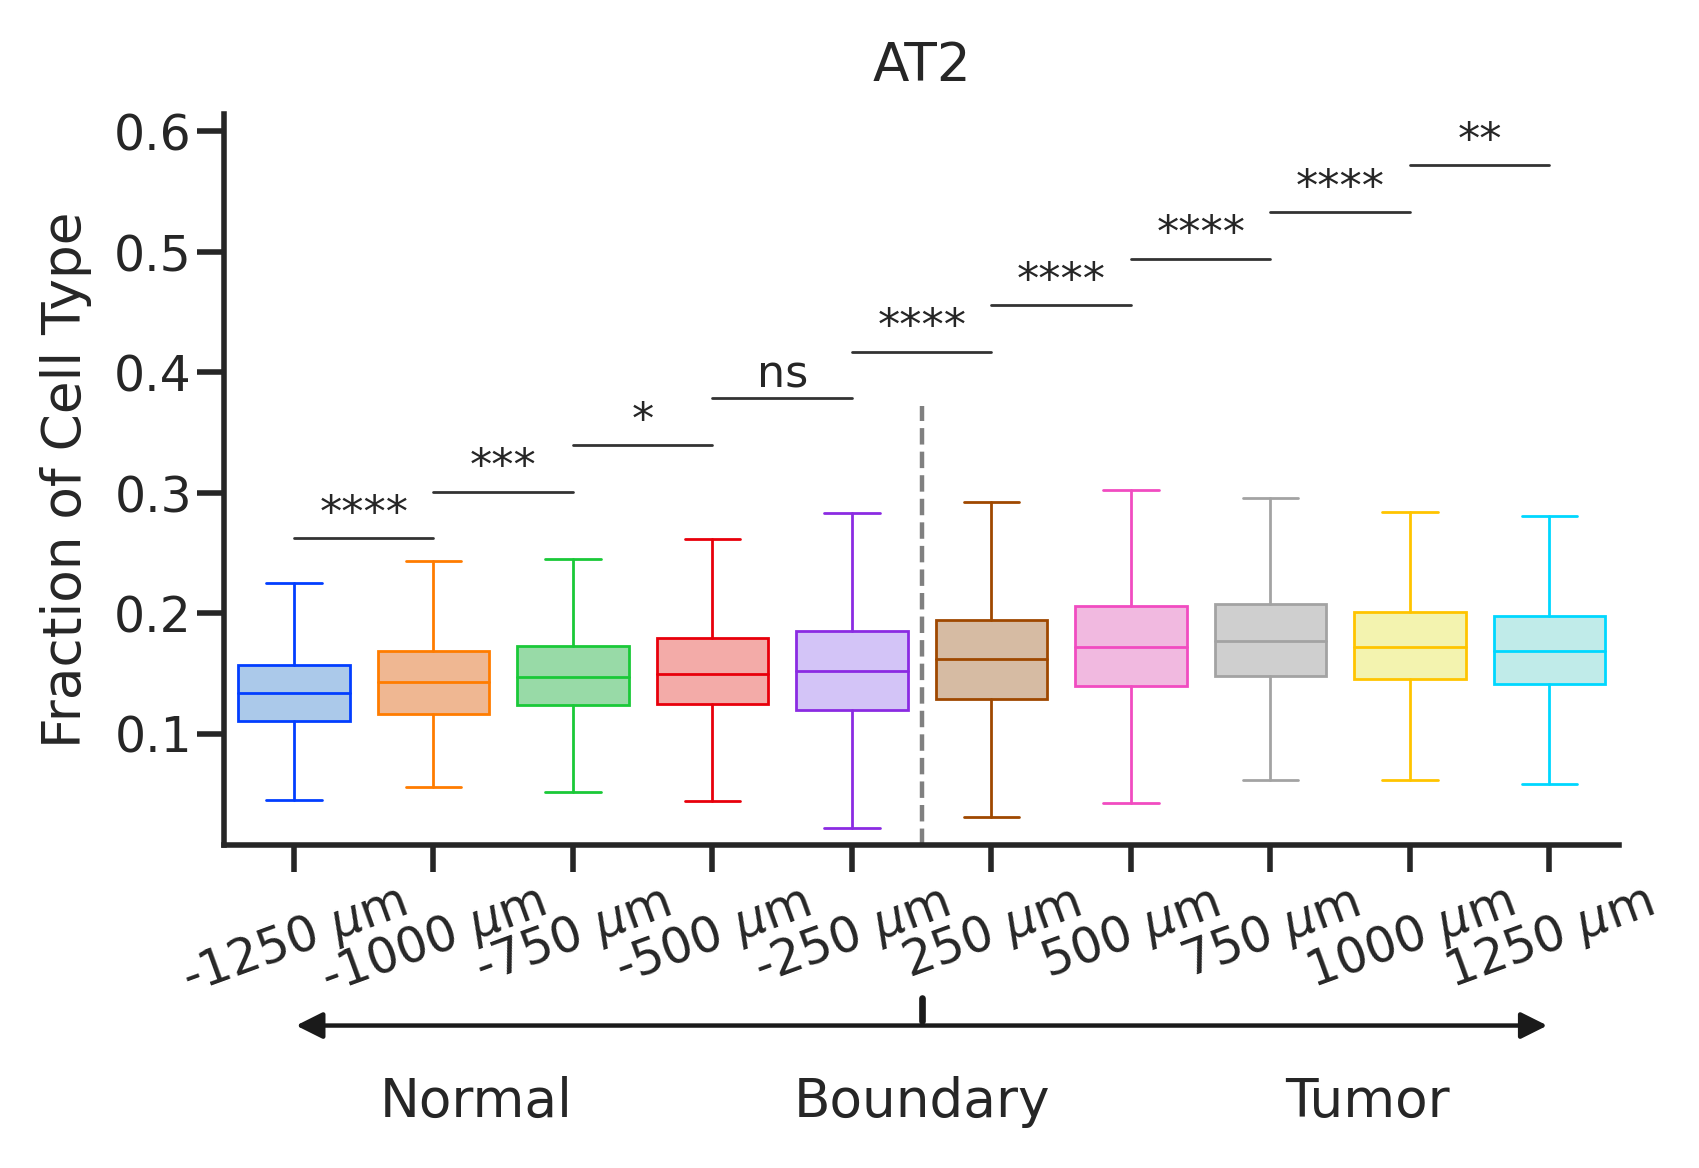

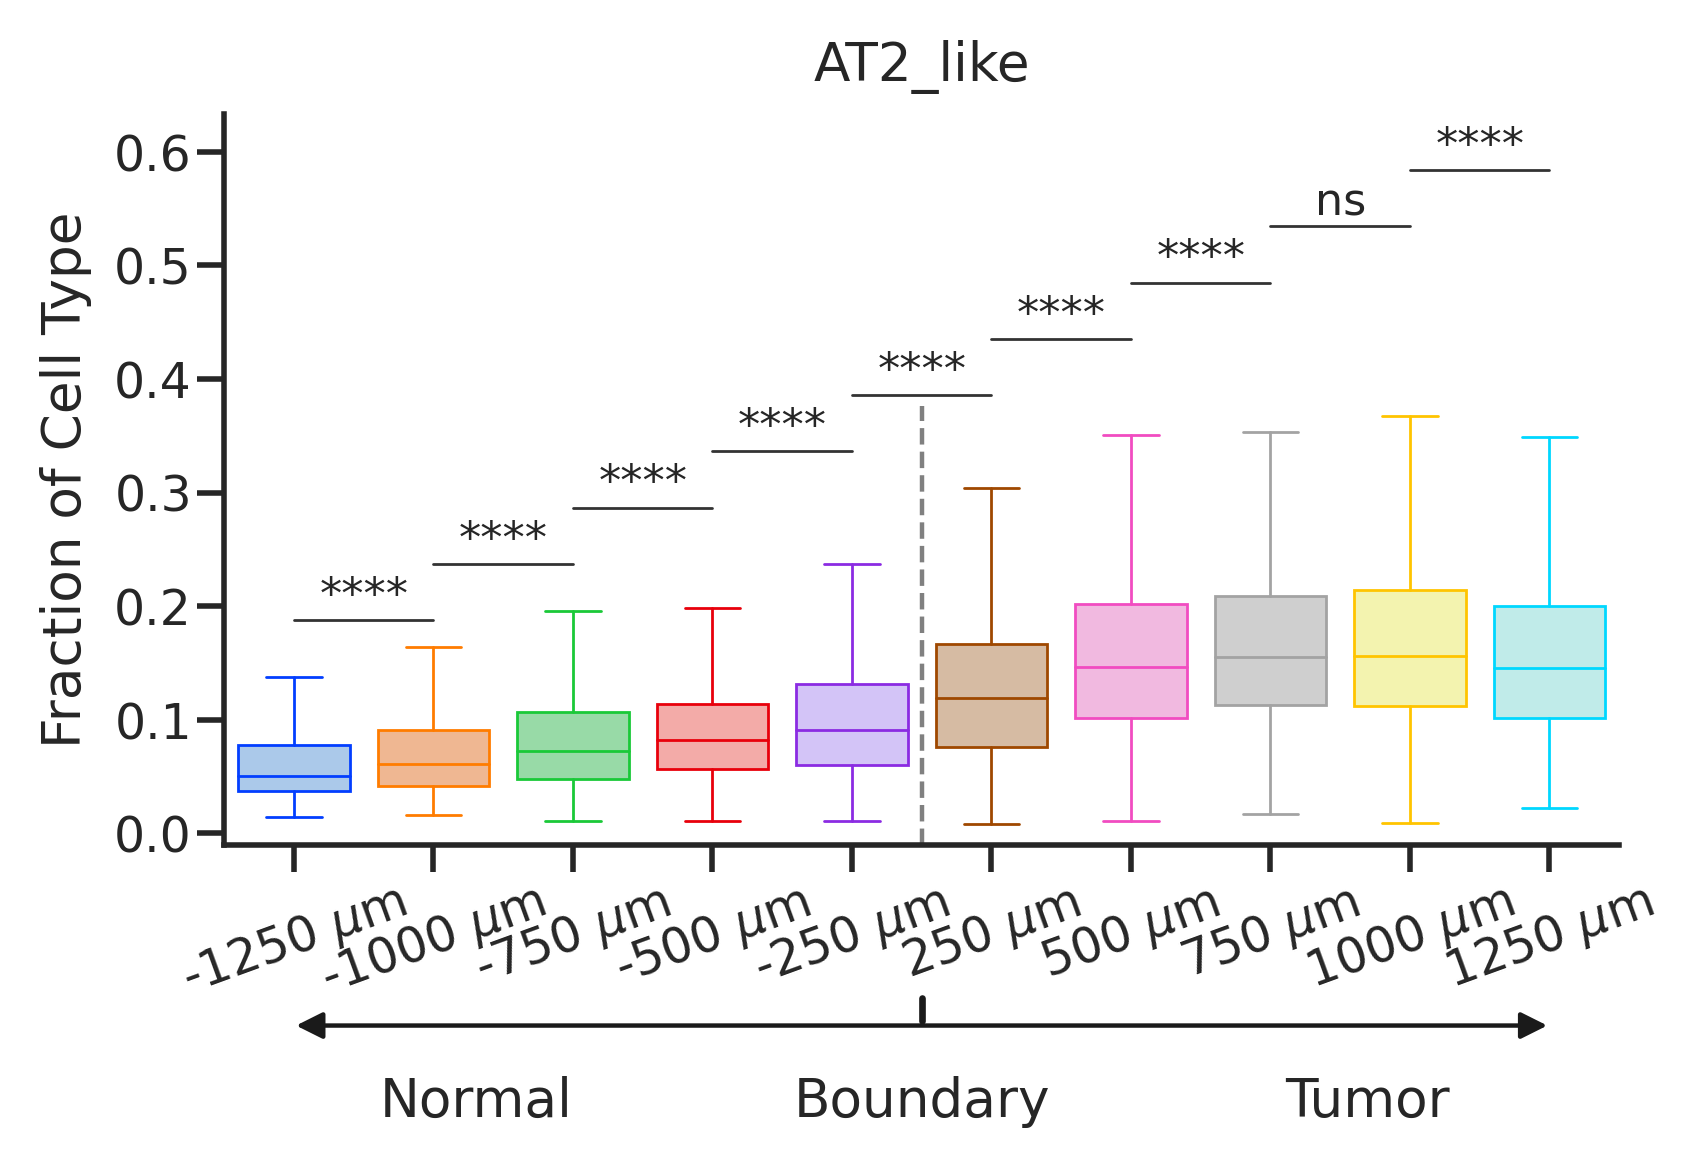

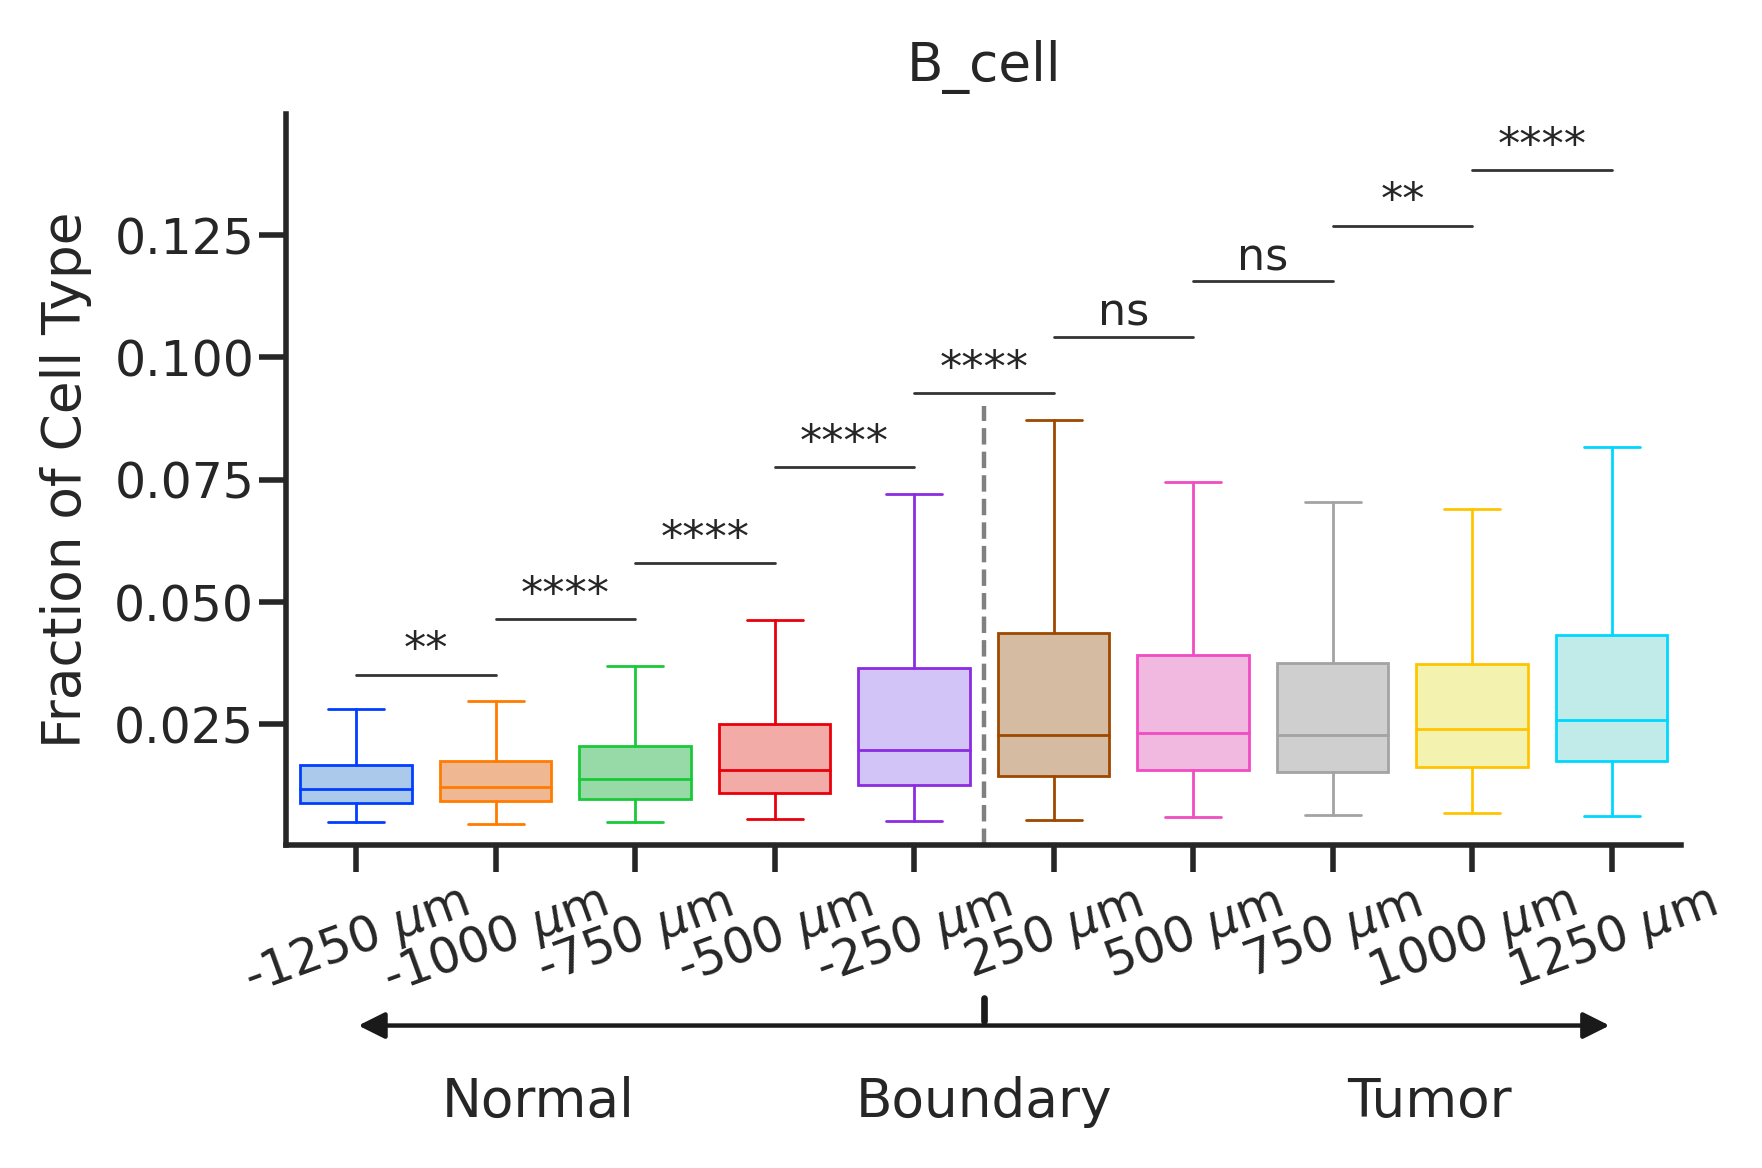

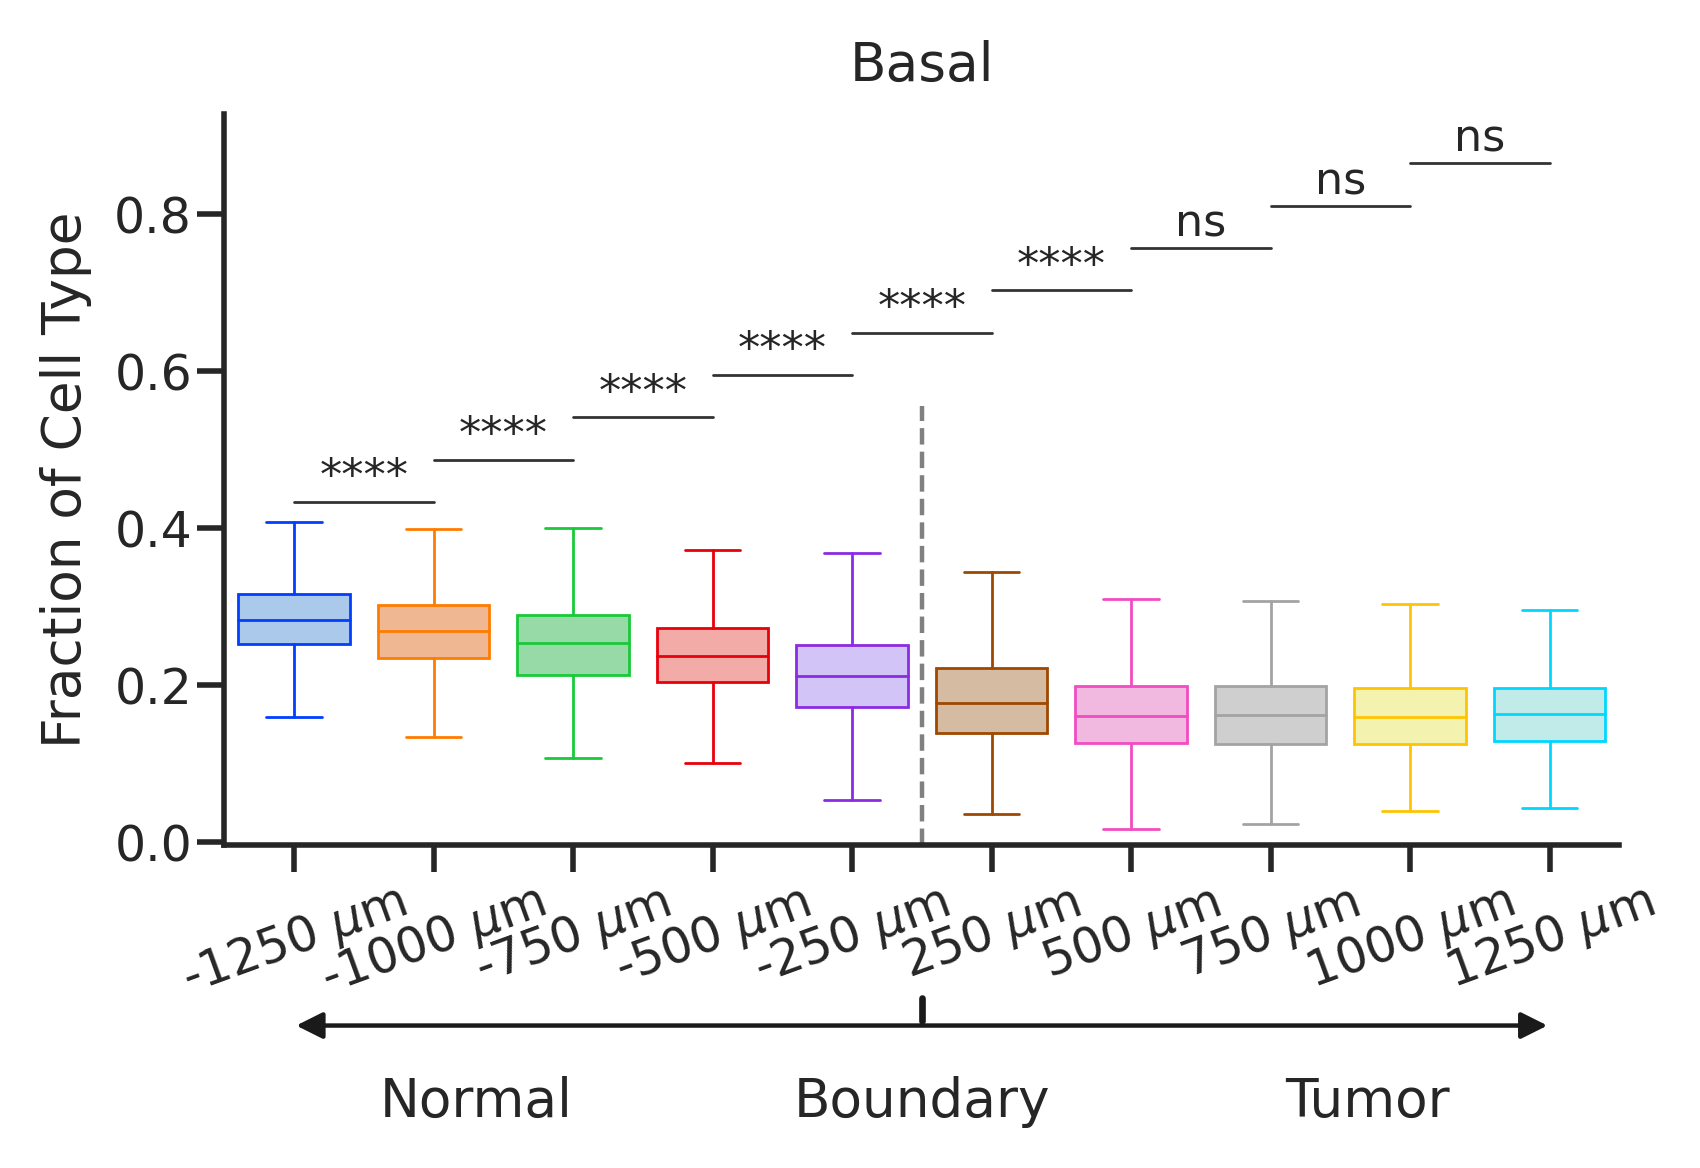

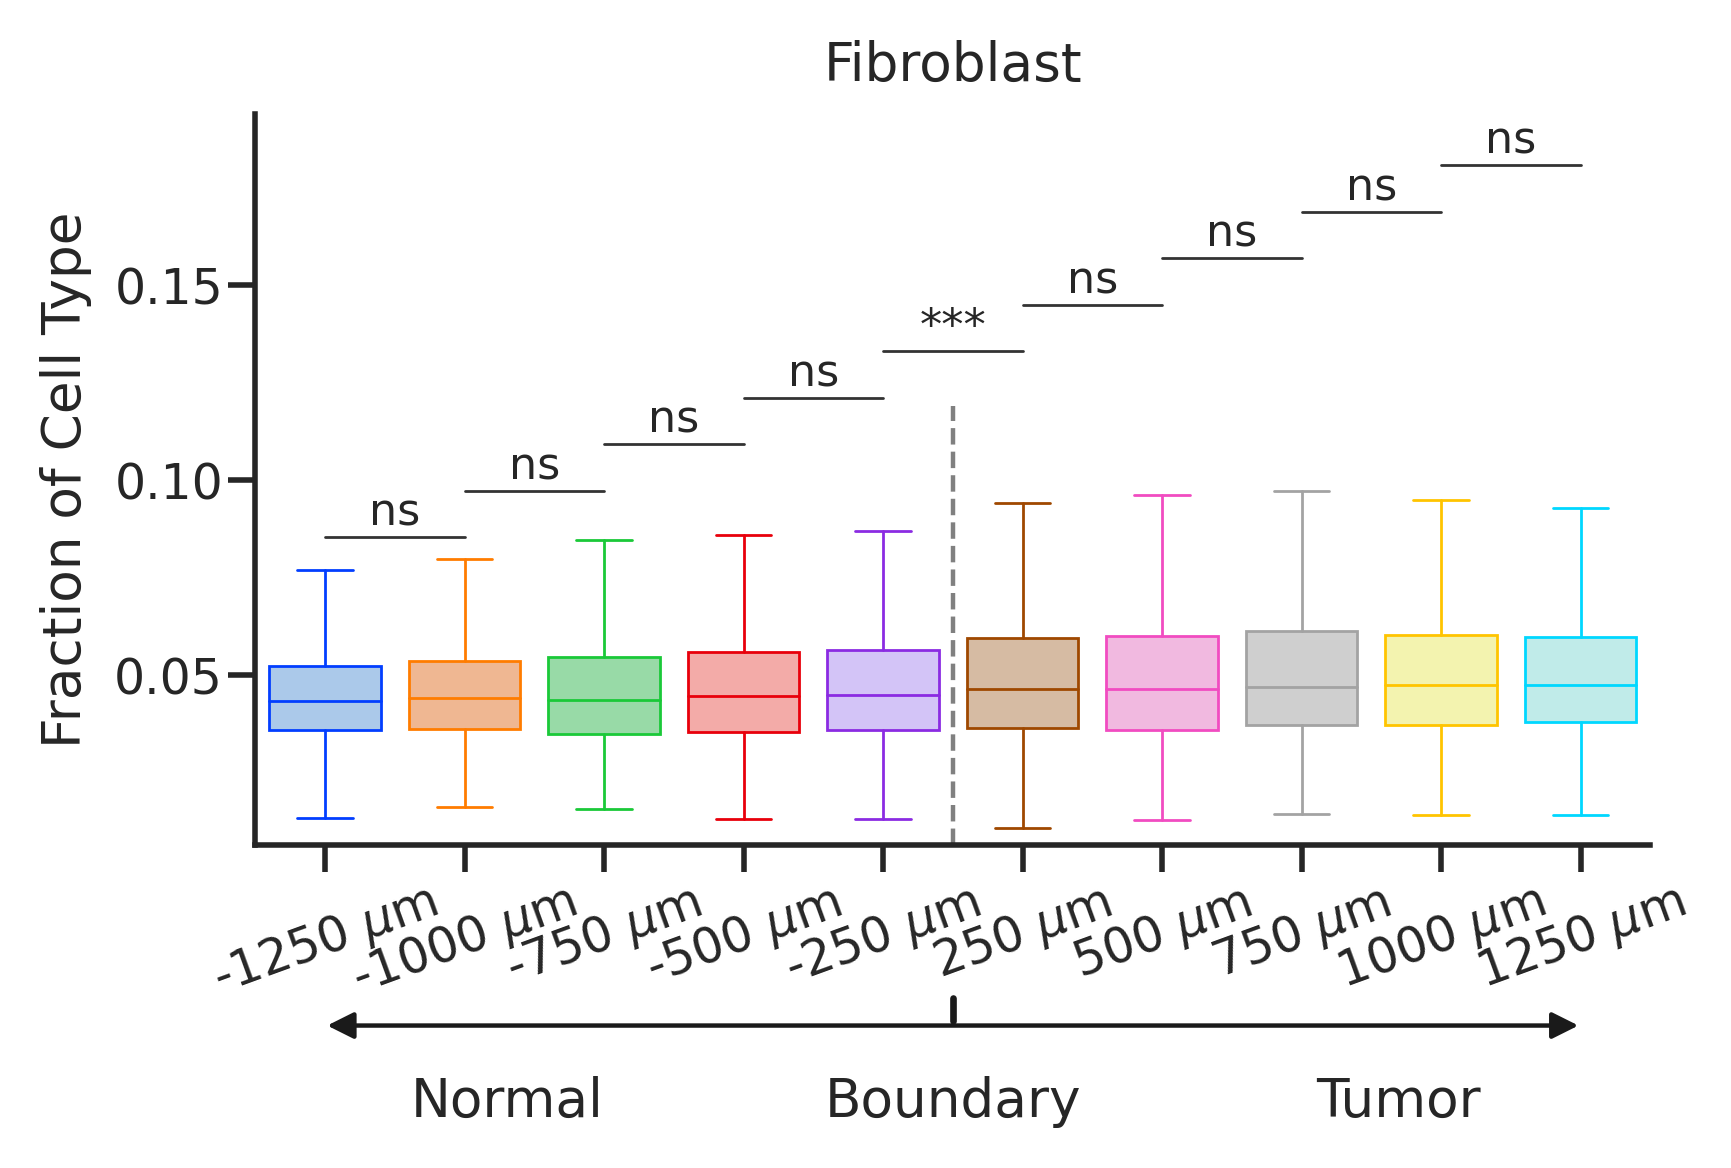

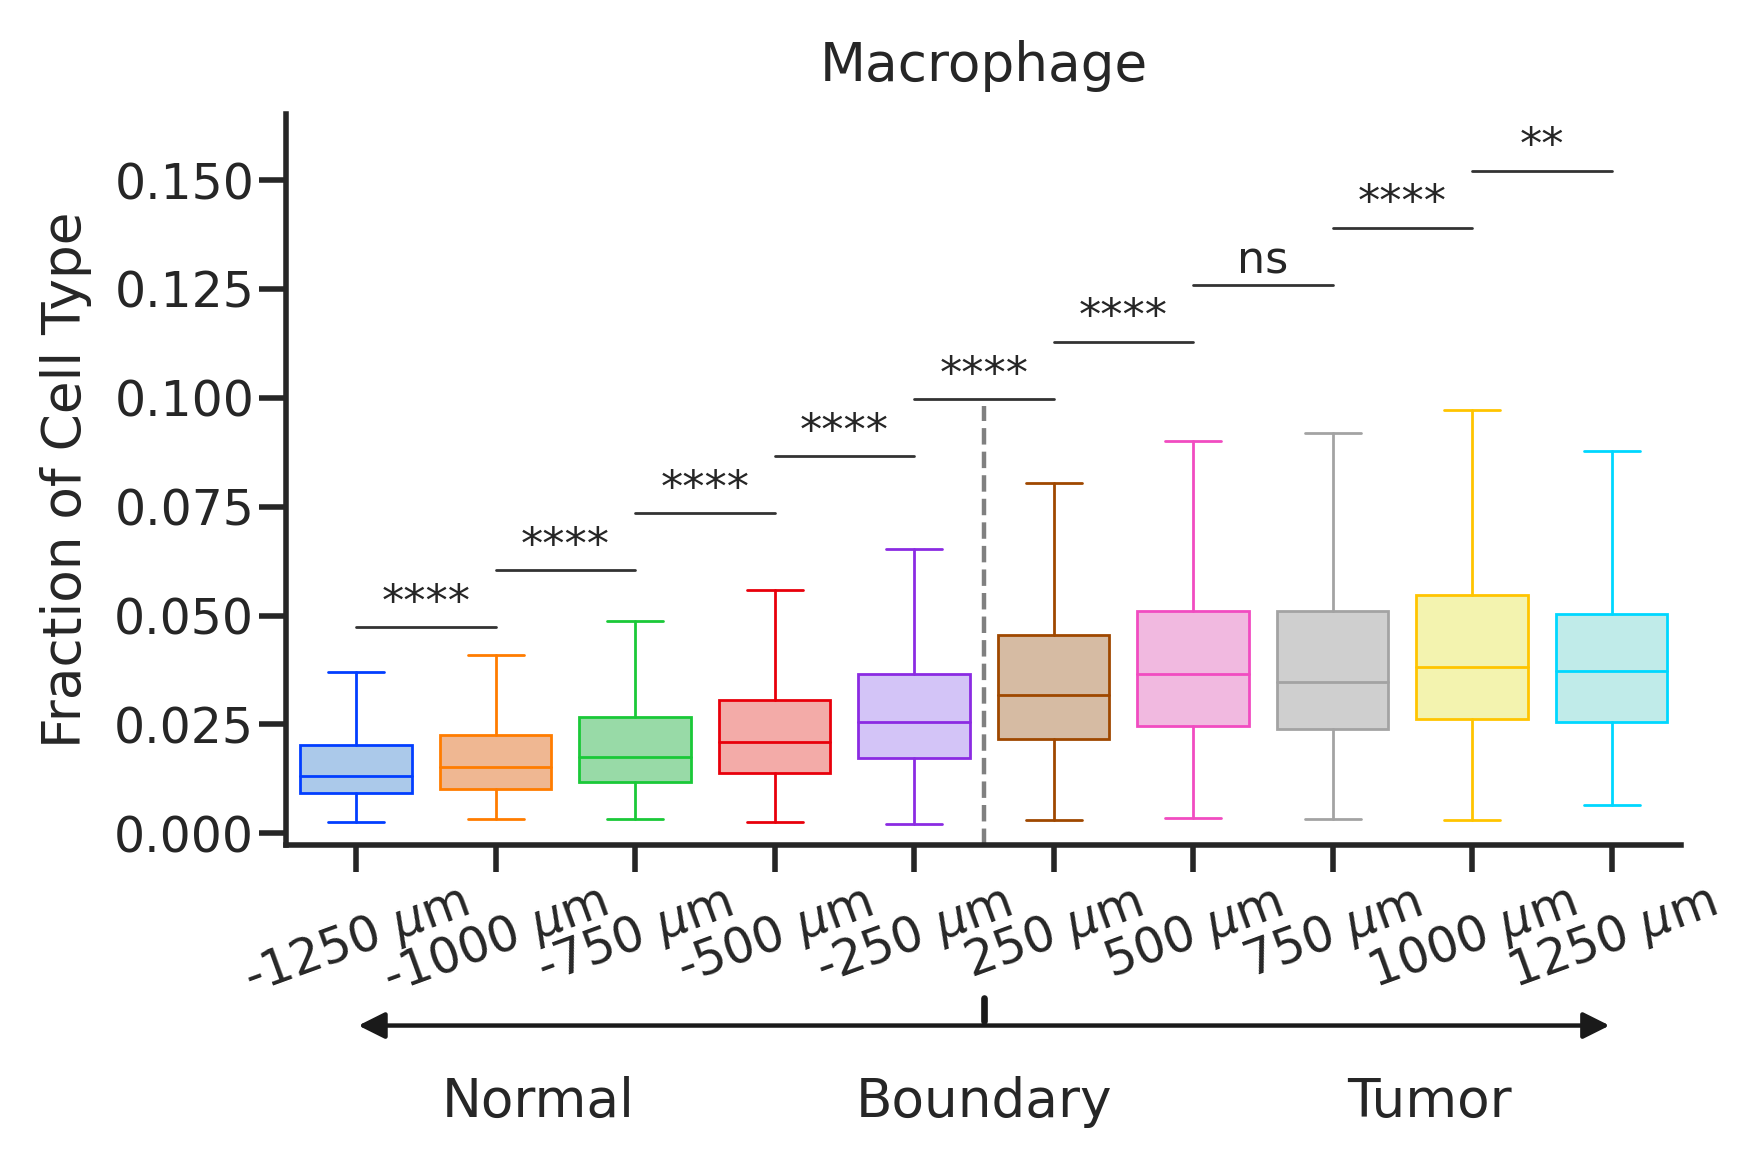

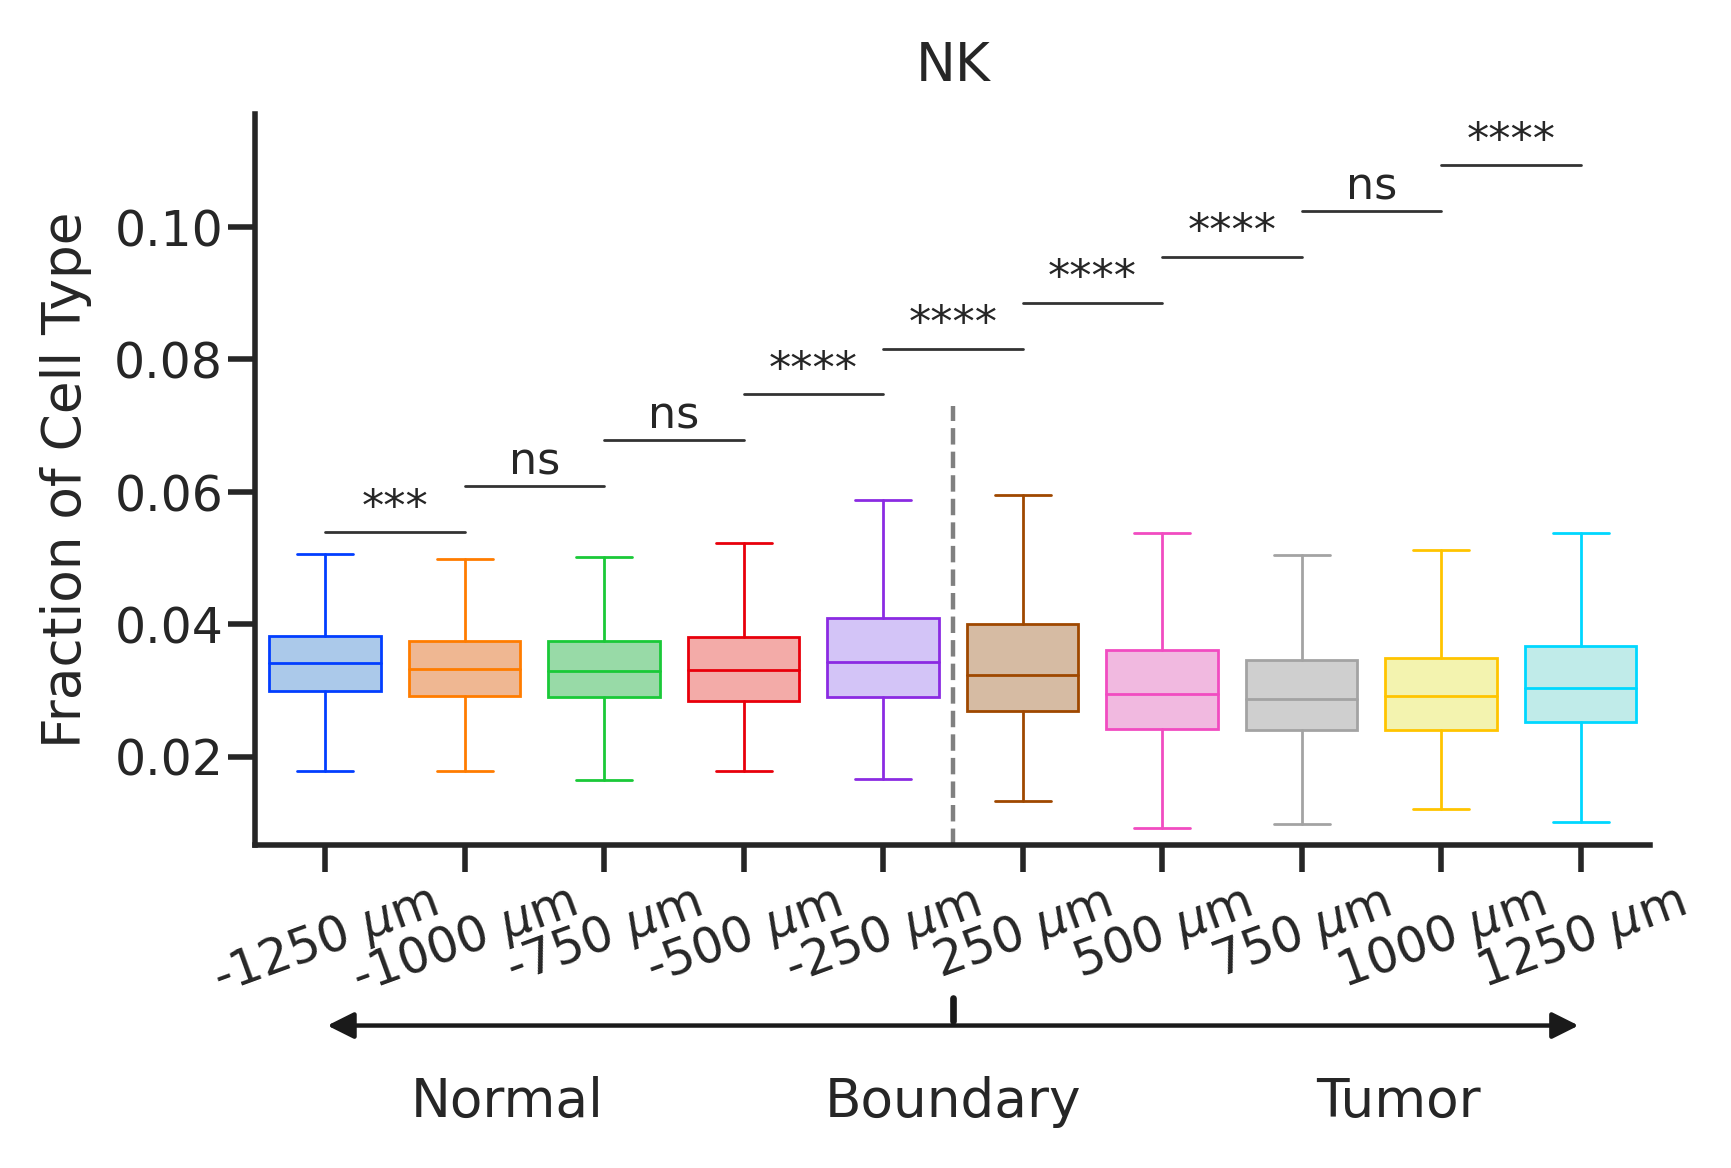

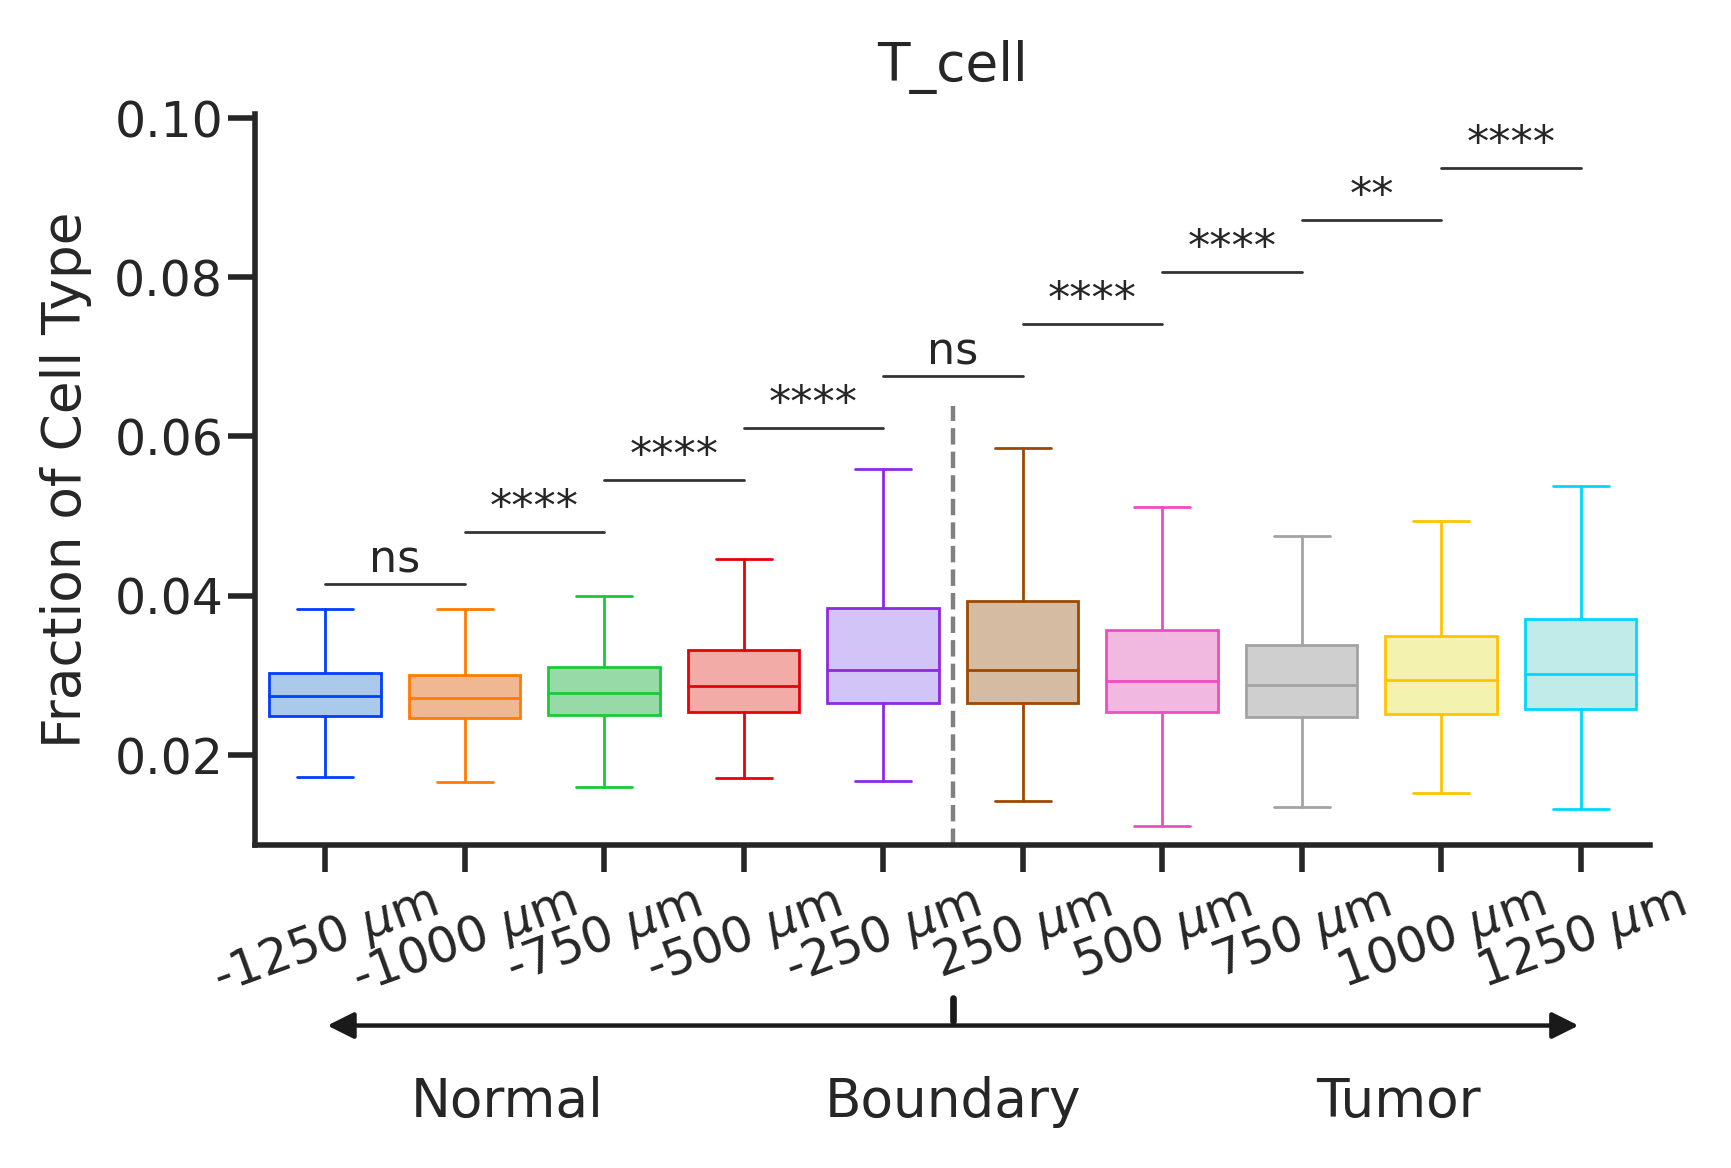

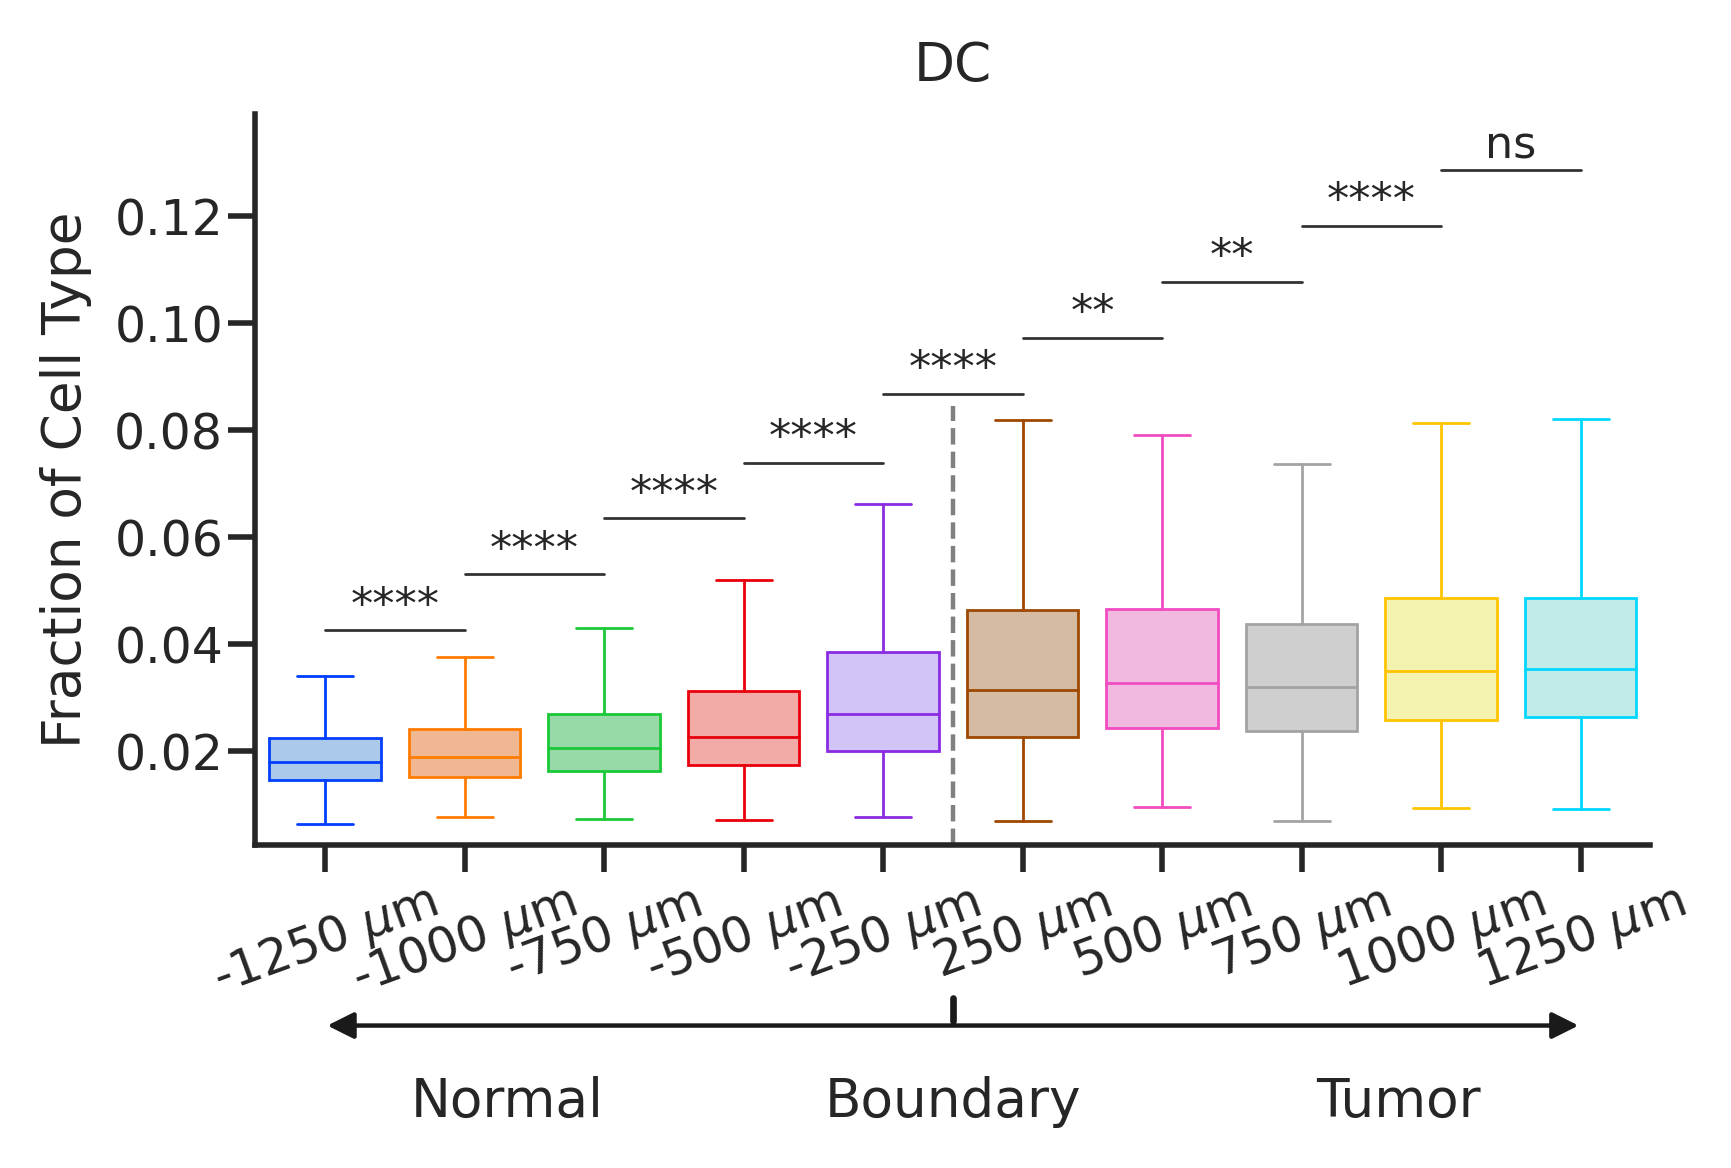

In [300]:
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
cells = ['AT2','AT2_like', 'B_cell', 'Basal', 'Fibroblast', 'Macrophage', 'NK', 'T_cell','DC']
for cc in cells:
    plot_show(df_cell_type_frac_regs,cc,save=False)

# Genes

In [53]:
celltype_list = ['AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 
                 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell']

gene_dict = {'DC': ['LYZ','HLA-DRB1','IL1B','LST1','HLA-DQA1','HLA-DQB1'],
            'Fibroblast':['LUM','DCN','FBLN1','APOD','COL1A1','IGFBP6','CFD'],
            'Macrophage':['CD68','MARCO','CTSD','C1QA','C1QB','APOC1','APOE'],
            'NK':['NKG7','GZMA','GNLY','CD3G','FGFBP2'],
            'T_cell':['CD2','CD3D','CD3E','CXCR4','IL32'],
             'B_cell':['MS4A1','FKBP11', 'DERL3','CD79A','MZB1','IGHA2'], # no 'IGLL5','IGJ' in data
            'Club':['SCGB1A1','SCGB3A1','PIGR','WFDC2'],
            'Ciliated':['CAPS','TPPP3','C9orf24'],
            'Endothelial':['RAMP2','VWF','GNG11','CLDNS','DARC'],
             'AT1':['RTKN2','EMP2'],
             'AT2':['PIGR', 'WFDC2','SFTA2','NAPSA','SFTPB','SFTPD','SFTPA1','SFTPC'],
             'AT2_like': ['MDK','TIMP1','IFI27','EPCAM','SCGB3A2'],
             'Basal':['KRT15','S100A2'] # no MIR205HG 
            }

In [56]:
adass = [adata_p5_ob.copy(), adata_p10_p5.copy(), adata_p15_p10.copy(), 
         adata_p20_p15.copy(), adata_m5_ob.copy(), adata_m10_m5.copy(), adata_m15_m10.copy(), adata_m20_m15.copy()]
dist_lab = ['0-5','5-10','10-15','15-20', '-5-0', '-10--5','-15--10','-20--15']

celltype_list = ['AT2_like', 'B_cell', 'Basal', 'Fibroblast', 'Macrophage', 'NK', 'T_cell']

celltype = 'T_cell'
df_gene=None
for i, ada in enumerate(adass):
    i_df_gene = ada[:, gene_dict[celltype]].to_df()
    i_df_gene['region'] = [dist_lab[i]] * i_df_gene.shape[0]
        
    if i==0:
        df_gene = i_df_gene
    else:
        df_gene = pd.concat([df_gene, i_df_gene], ignore_index=True)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

15-20 vs. 10-15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.788e-01 U_stat=3.012e+05
10-15 vs. 5-10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.580e-01 U_stat=3.774e+05
5-10 vs. 0-5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.168e-03 U_stat=5.559e+05
0-5 vs. -5-0: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.520e-07 U_stat=1.642e+06
-5-0 vs. -10--5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.616e-08 U_stat=3.939e+06
-10--5 vs. -15--10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.201e-02 U_stat=3.790e+06
-15--10 vs. -20--15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg cor

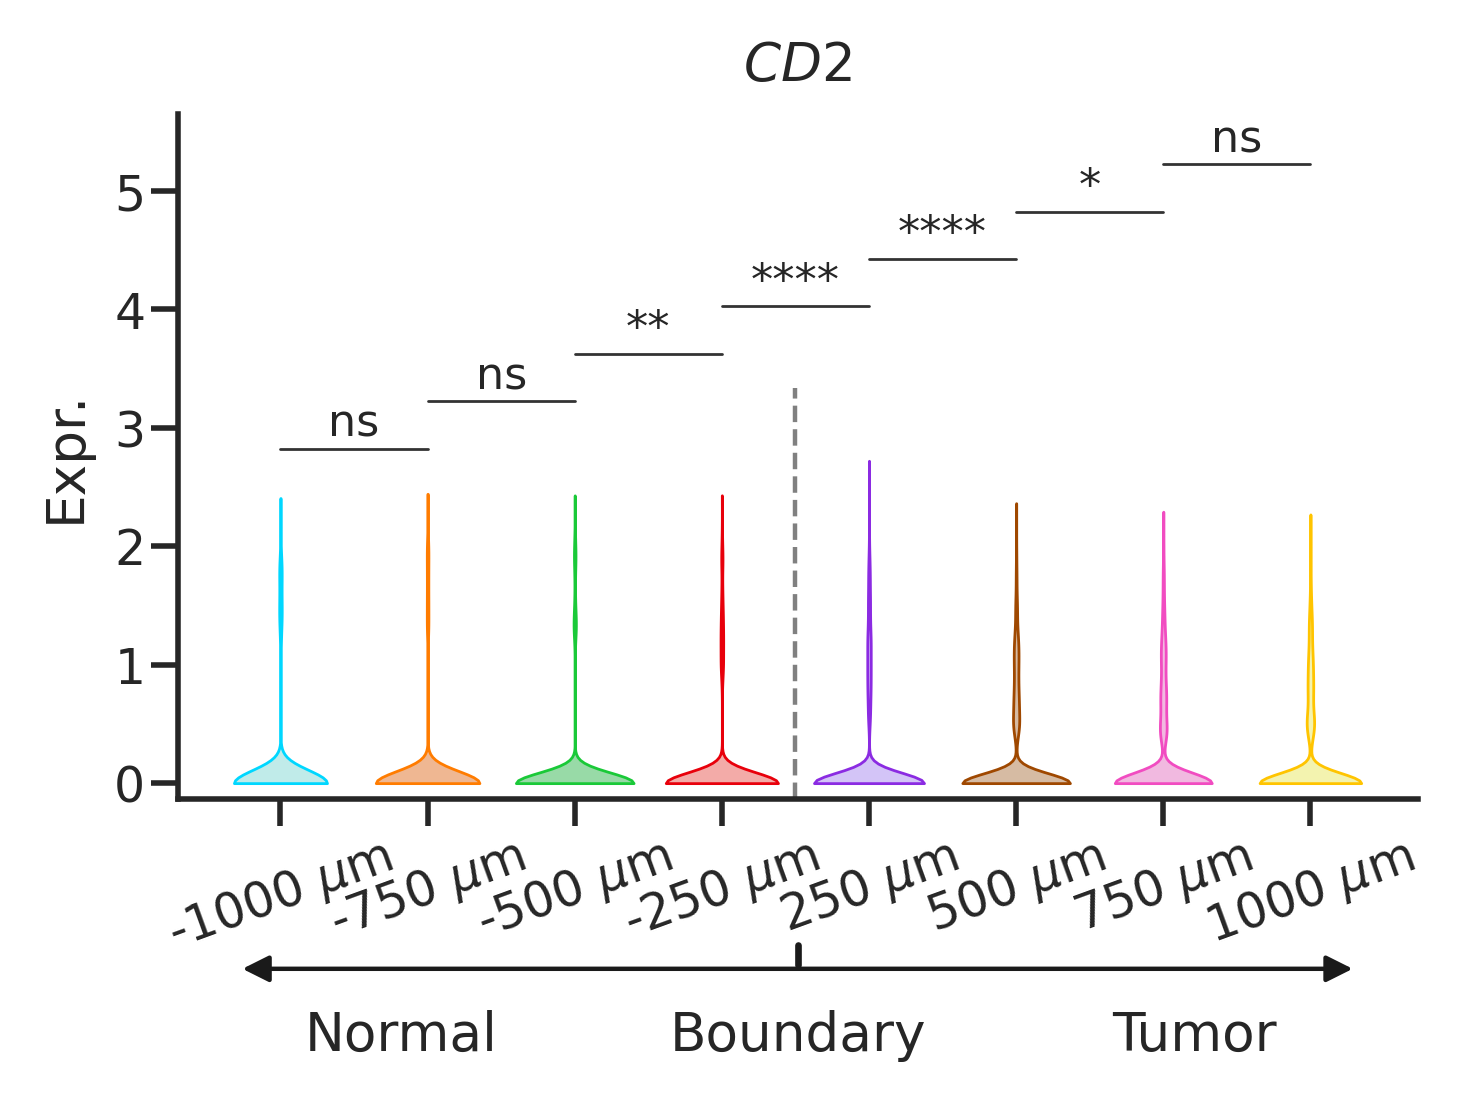

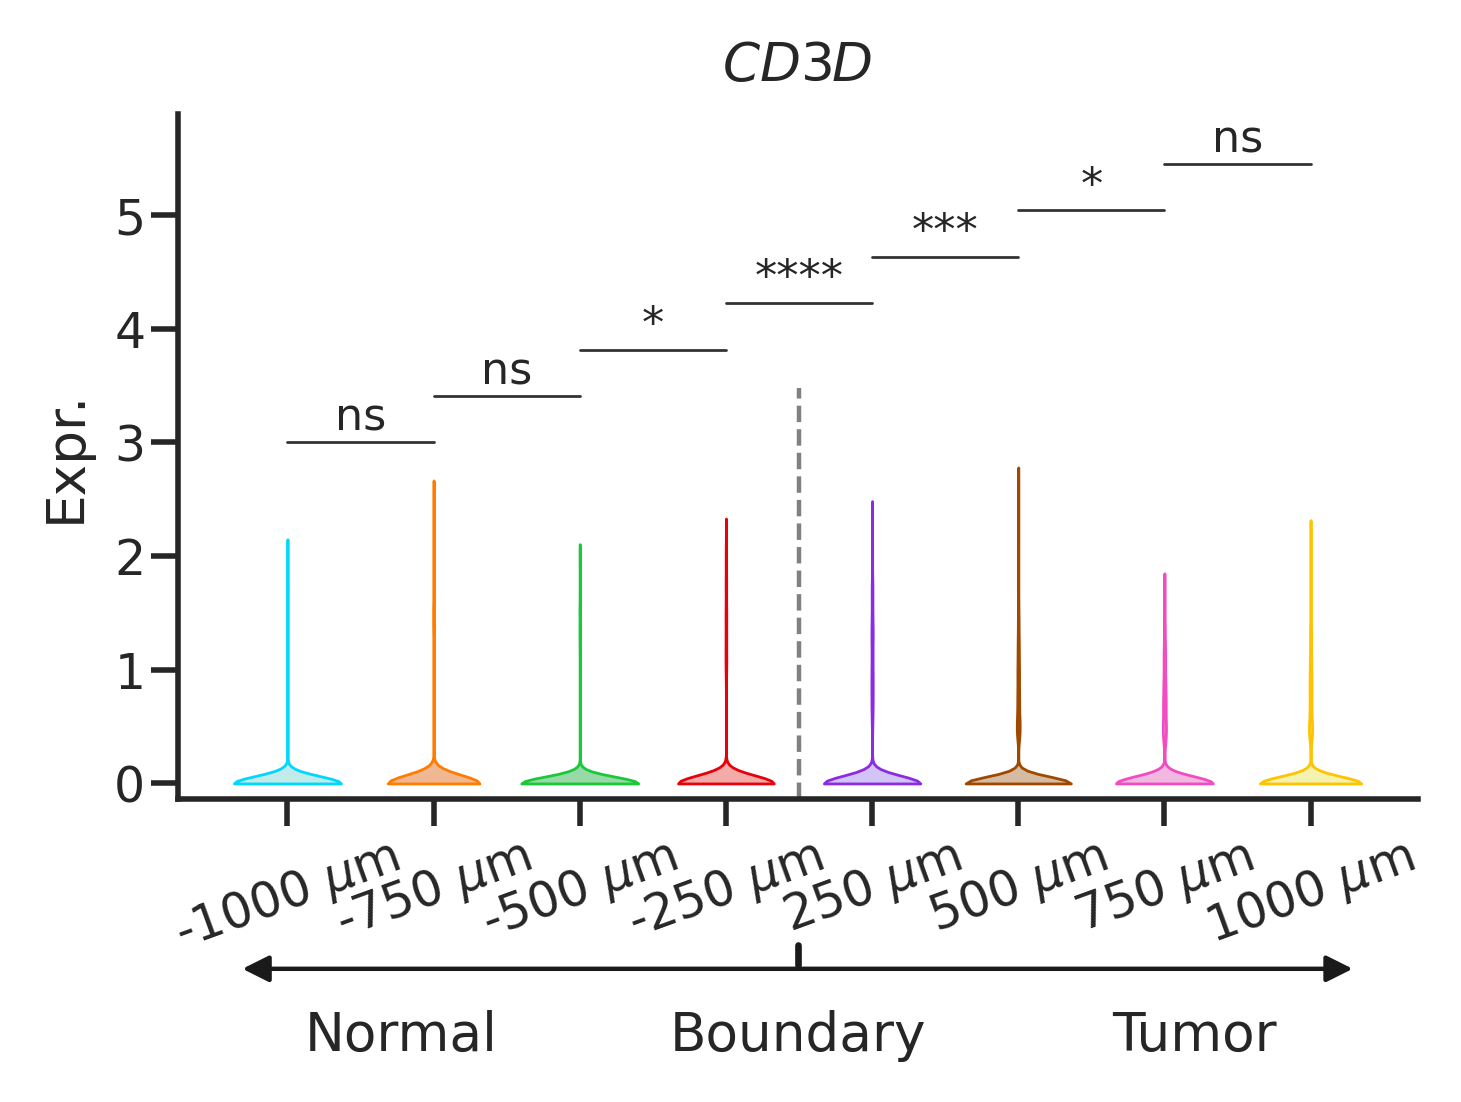

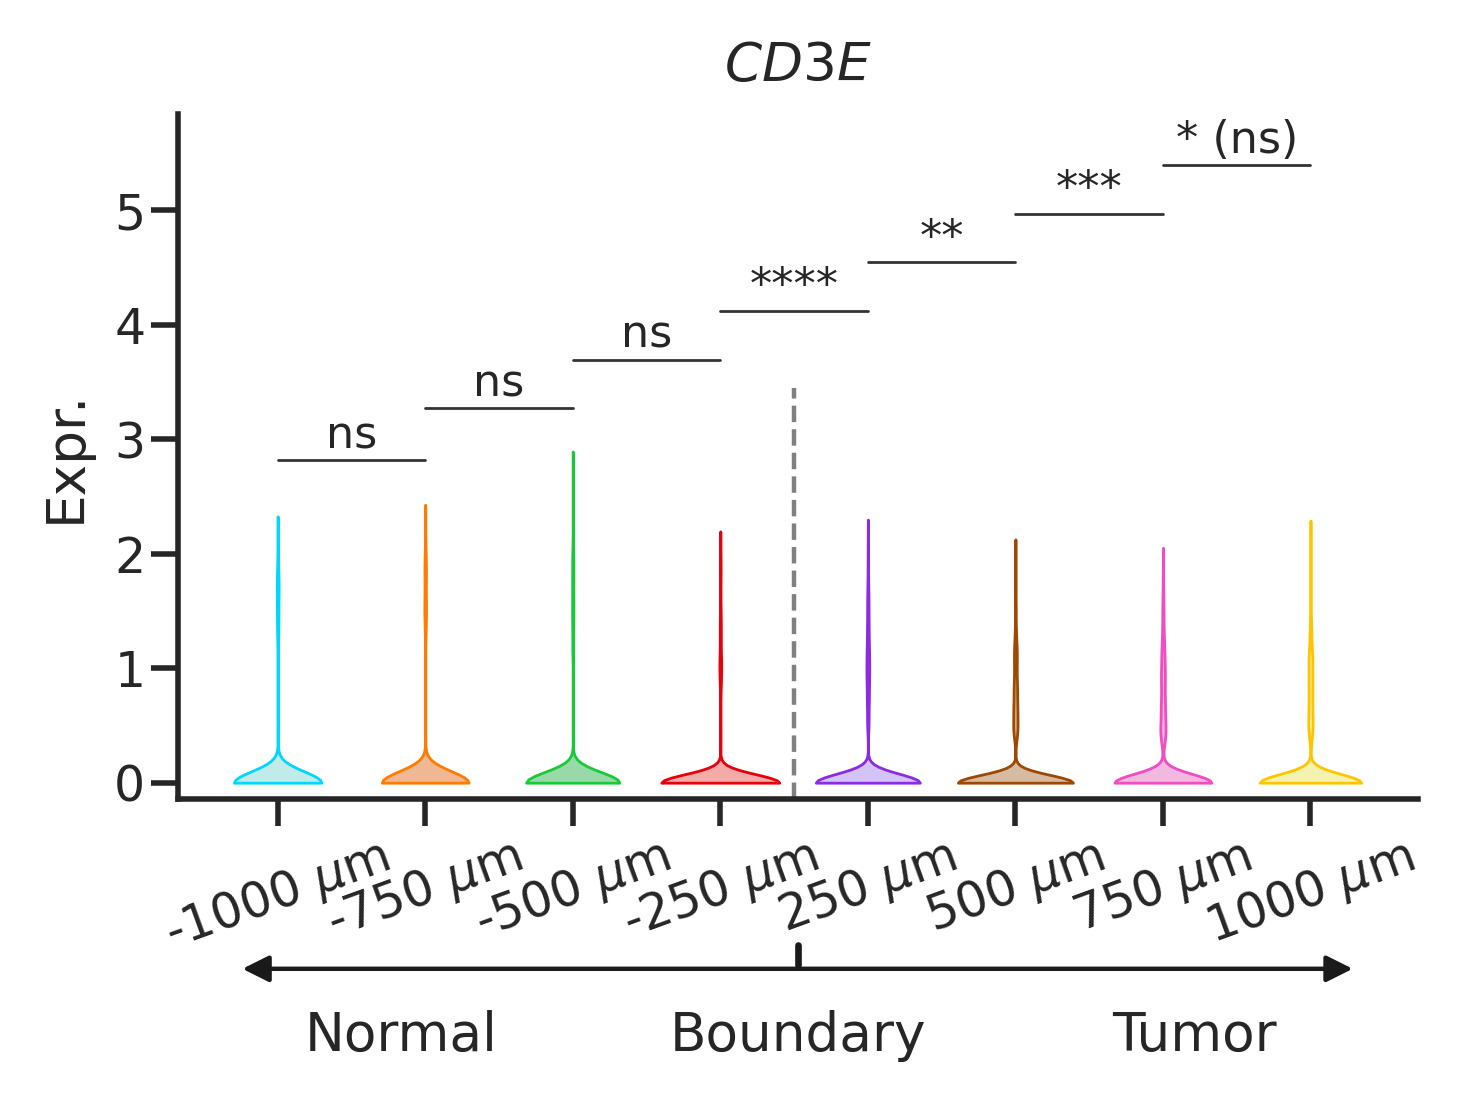

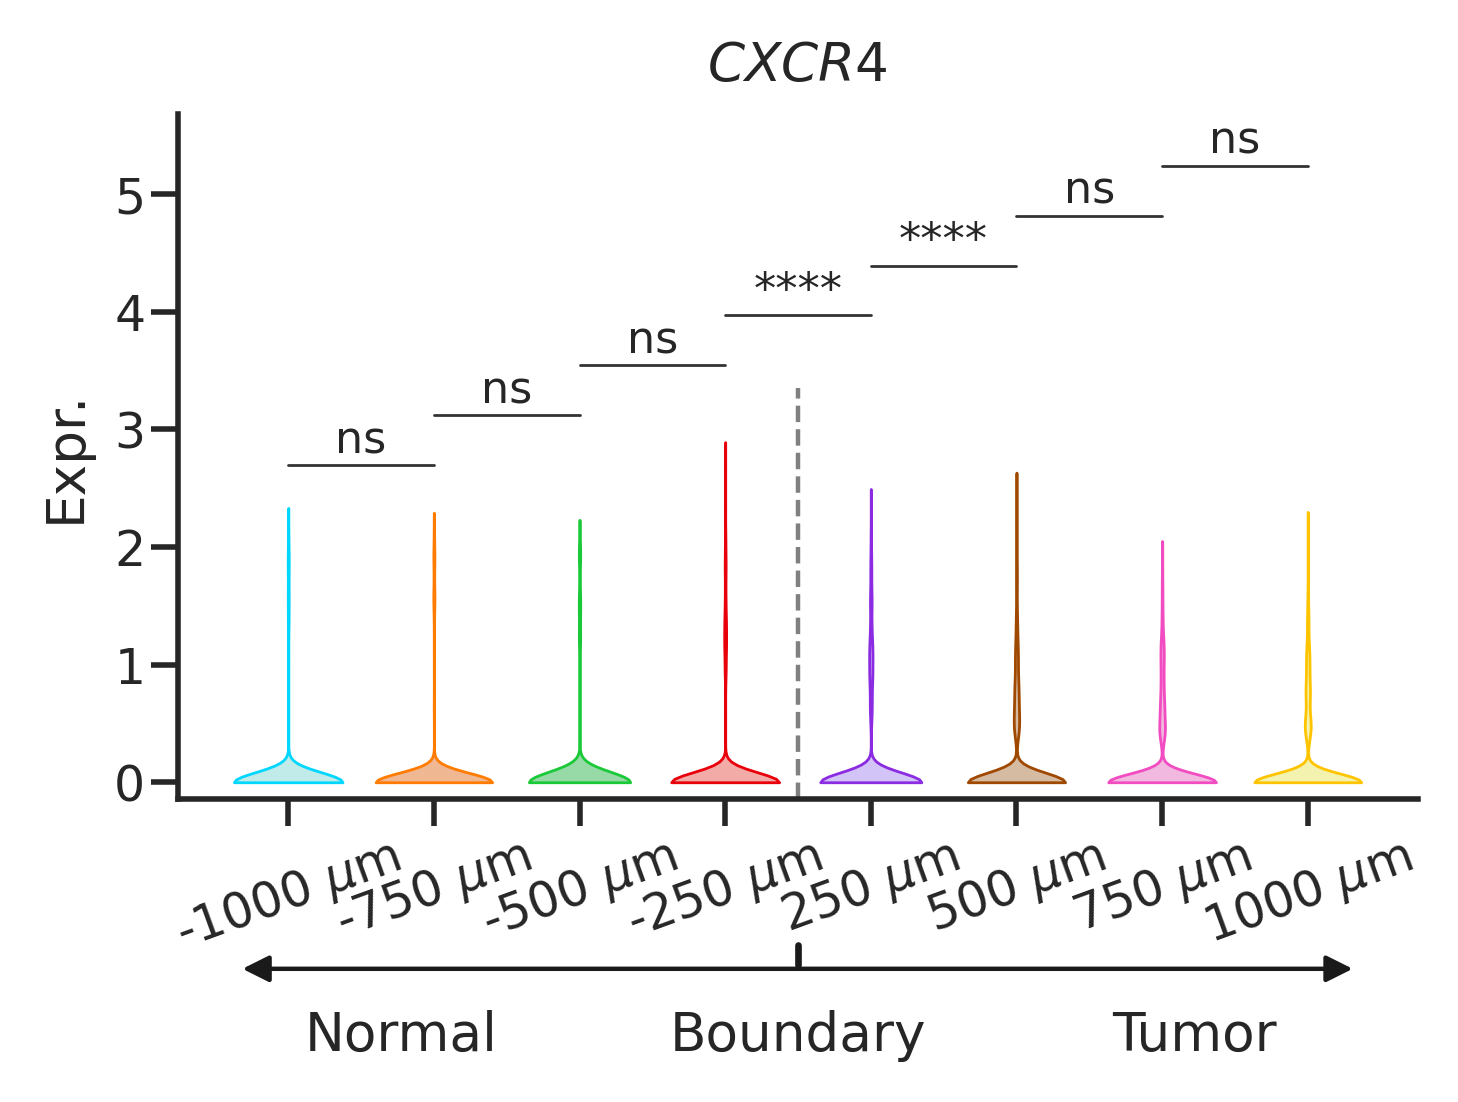

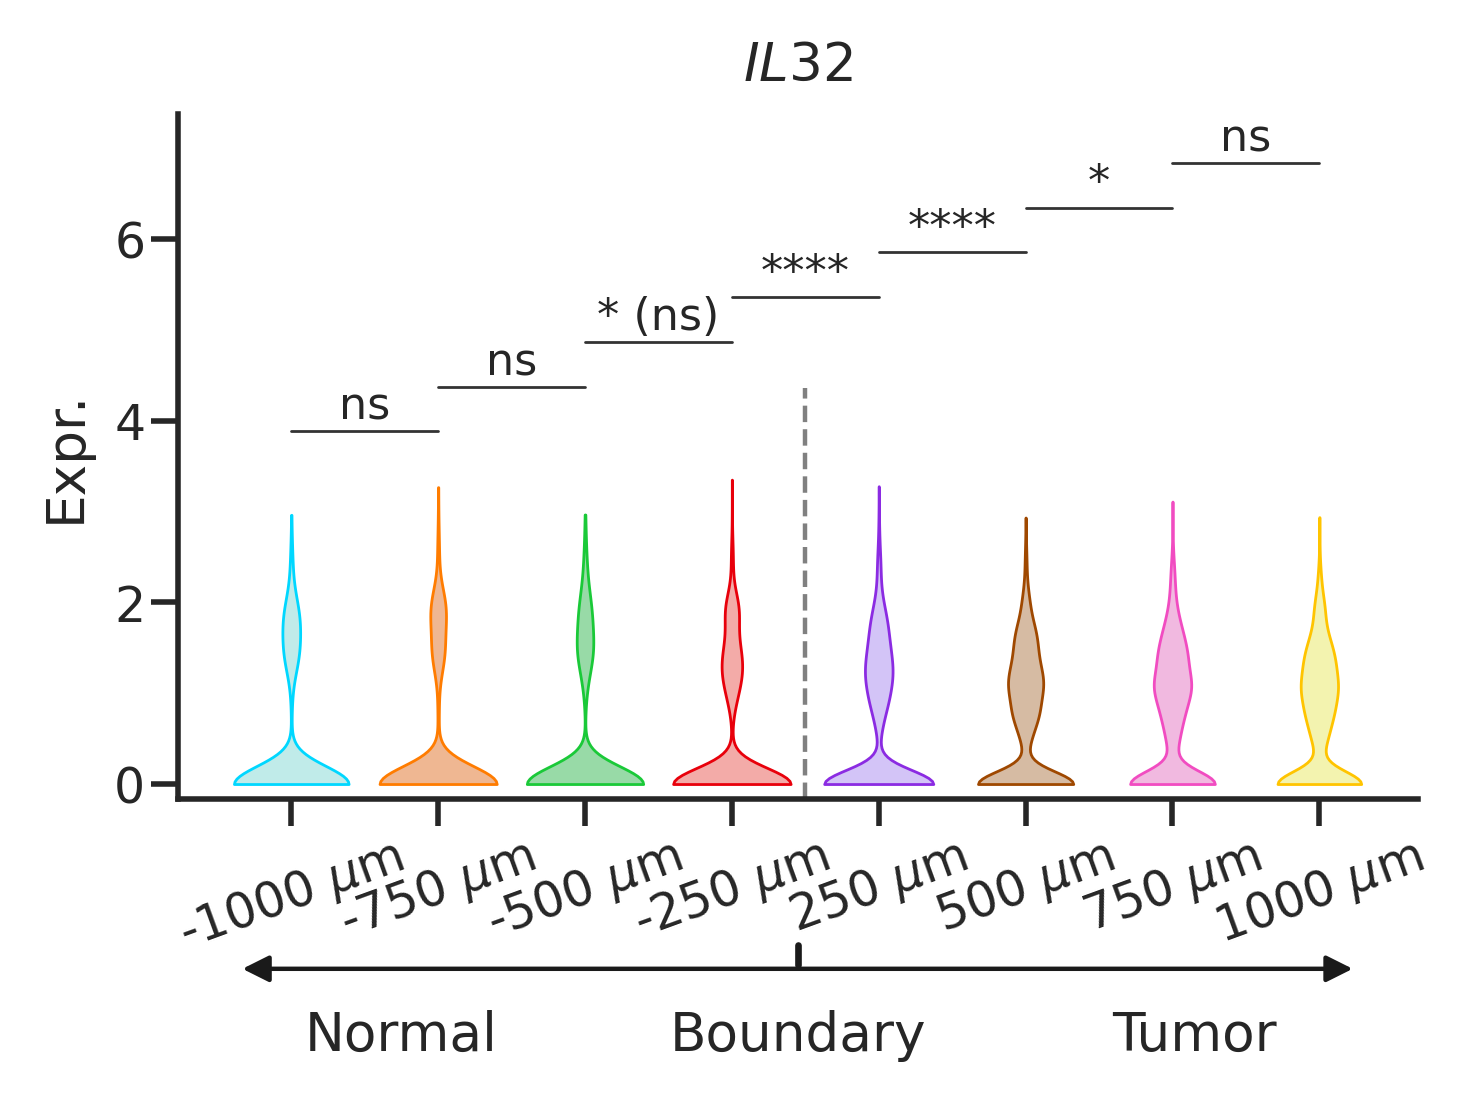

In [57]:
for gene in gene_dict[celltype]:
    plot_show(df_gene, gene, save=True,y_label='Expr.', gene=True, gene_cell_type=celltype)